<a href="https://colab.research.google.com/github/Kitan-Dara06/Kitan-Dara06/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ieee-fraud-detection.zip to ieee-fraud-detection.zip


In [5]:
import pandas as pd
import zipfile

with zipfile.ZipFile("ieee-fraud-detection.zip", "r") as zip_ref:
  zip_ref.extractall("train_transaction")
  zip_ref.extractall("train_identity")
  zip_ref.extractall("test_transaction")
  zip_ref.extractall("test_identity")

In [6]:
transaction_df = pd.read_csv("train_transaction/train_transaction.csv")
identity_df = pd.read_csv("train_identity/train_identity.csv")

In [7]:
transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = transaction_df.merge(identity_df, on = "TransactionID", how = 'left' )

In [9]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [11]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
categorical

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [13]:
Numerical = [col for col in df.columns if df[col].dtype != 'o']

In [14]:
Numerical

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [15]:
num_categorical_cols = df.select_dtypes(include=['object']).shape[1]
print(f"Total categorical columns: {num_categorical_cols}")


Total categorical columns: 31


In [16]:
numerical_cols = df.select_dtypes(exclude=['object']).shape[1]
print(f"Total numerical columns: {numerical_cols}")

Total numerical columns: 403


In [17]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for ProductCD:
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

Value counts for card4:
card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

Value counts for card6:
card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

Value counts for P_emaildomain:
P_emaildomain
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net   

In [18]:
# from sklearn.preprocessing import OneHotEncoder

In [19]:
# # encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# encoded_category = encoder.fit_transform(df[categorical])

In [20]:
# encoded_category

In [21]:
# import pandas as pd
# encoded_df = pd.DataFrame(encoded_category, columns=encoder.get_feature_names_out(categorical))

# # Drop original categorical columns and concatenate with the new encoded DataFrame
# df_final = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)

In [22]:
df.shape

(590540, 434)

In [23]:
df.to_csv("final_df.csv")

In [24]:
chunk_size = 100000
df = pd.read_csv("final_df.csv", chunksize= chunk_size)

In [25]:
for chunk in df:
  print(chunk.shape)

(100000, 435)
(100000, 435)
(100000, 435)
(100000, 435)
(100000, 435)
(90540, 435)


In [26]:
chunk.shape

(90540, 435)

In [27]:
chunk_size = 100000
df = pd.read_csv("final_df.csv", chunksize= chunk_size)
for i, chunk in enumerate(df):
  chunk.to_csv(f"chunk_df_{i+1}.csv", index=False)
df1 = pd.read_csv("chunk_df_1.csv")

In [28]:
df2 = pd.read_csv("chunk_df_2.csv")

In [29]:
df1

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,3086995,0,2005989,55.385,C,2256,545.0,185.0,visa,...,mobile safari uiwebview,NaN,NaN,NaN,F,F,F,T,mobile,NaN
99996,99996,3086996,0,2006074,117.000,W,2518,555.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,3086997,0,2006135,50.000,S,2748,111.0,150.0,visa,...,chrome 63.0,24.0,1440x900,match_status:2,T,F,T,T,desktop,MacOS
99998,99998,3086998,0,2006177,100.000,H,16075,514.0,150.0,mastercard,...,safari generic,24.0,1920x1080,match_status:2,T,F,F,T,desktop,MacOS


In [30]:
for col in df1.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df1[col].value_counts())



Value counts for ProductCD:
ProductCD
W    56878
H    15521
R    13724
C    11351
S     2526
Name: count, dtype: int64

Value counts for card4:
card4
visa                65602
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64

Value counts for card6:
card6
debit              64923
credit             35063
debit or credit        7
charge card            3
Name: count, dtype: int64

Value counts for P_emaildomain:
P_emaildomain
gmail.com           36290
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net               376
me.com                373
ymail.com             369
yahoo.com.mx          292
charter.net           233
optonline.net        

In [31]:
import seaborn as sns

In [32]:
null_count = df1.isnull().sum()

In [33]:
null_count = df1.isnull().sum()

for col, count in null_count.items():  # col = column name, count = number of nulls
    if count > 0:
        print(f"Column: {col}, Missing Values: {count}")


Column: card2, Missing Values: 1354
Column: card3, Missing Values: 3
Column: card4, Missing Values: 7
Column: card5, Missing Values: 525
Column: card6, Missing Values: 4
Column: addr1, Missing Values: 9037
Column: addr2, Missing Values: 9037
Column: dist1, Missing Values: 69653
Column: dist2, Missing Values: 91769
Column: P_emaildomain, Missing Values: 15393
Column: R_emaildomain, Missing Values: 65454
Column: D2, Missing Values: 57633
Column: D3, Missing Values: 56598
Column: D4, Missing Values: 46175
Column: D5, Missing Values: 65327
Column: D6, Missing Values: 87259
Column: D7, Missing Values: 93928
Column: D8, Missing Values: 78289
Column: D9, Missing Values: 78289
Column: D10, Missing Values: 30926
Column: D11, Missing Values: 71208
Column: D12, Missing Values: 89495
Column: D13, Missing Values: 90479
Column: D14, Missing Values: 88847
Column: D15, Missing Values: 34047
Column: M1, Missing Values: 68553
Column: M2, Missing Values: 68553
Column: M3, Missing Values: 68553
Column: M4

In [34]:

null_percentage = df1.isnull().sum() / len(df1) * 100


In [35]:
for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count > 0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")




Column: card2, Missing Values: 1.35%
Column: card3, Missing Values: 0.00%
Column: card4, Missing Values: 0.01%
Column: card5, Missing Values: 0.53%
Column: card6, Missing Values: 0.00%
Column: addr1, Missing Values: 9.04%
Column: addr2, Missing Values: 9.04%
Column: dist1, Missing Values: 69.65%
Column: dist2, Missing Values: 91.77%
Column: P_emaildomain, Missing Values: 15.39%
Column: R_emaildomain, Missing Values: 65.45%
Column: D2, Missing Values: 57.63%
Column: D3, Missing Values: 56.60%
Column: D4, Missing Values: 46.17%
Column: D5, Missing Values: 65.33%
Column: D6, Missing Values: 87.26%
Column: D7, Missing Values: 93.93%
Column: D8, Missing Values: 78.29%
Column: D9, Missing Values: 78.29%
Column: D10, Missing Values: 30.93%
Column: D11, Missing Values: 71.21%
Column: D12, Missing Values: 89.50%
Column: D13, Missing Values: 90.48%
Column: D14, Missing Values: 88.85%
Column: D15, Missing Values: 34.05%
Column: M1, Missing Values: 68.55%
Column: M2, Missing Values: 68.55%
Column:

In [36]:
for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count > 70:
        print(f"Column: {col}, Missing Values: {count:.2f}%")

col = [col for col, count in null_percentage.items() if count > 70]

Column: dist2, Missing Values: 91.77%
Column: D6, Missing Values: 87.26%
Column: D7, Missing Values: 93.93%
Column: D8, Missing Values: 78.29%
Column: D9, Missing Values: 78.29%
Column: D11, Missing Values: 71.21%
Column: D12, Missing Values: 89.50%
Column: D13, Missing Values: 90.48%
Column: D14, Missing Values: 88.85%
Column: M7, Missing Values: 83.96%
Column: M8, Missing Values: 83.96%
Column: M9, Missing Values: 83.96%
Column: V1, Missing Values: 71.21%
Column: V2, Missing Values: 71.21%
Column: V3, Missing Values: 71.21%
Column: V4, Missing Values: 71.21%
Column: V5, Missing Values: 71.21%
Column: V6, Missing Values: 71.21%
Column: V7, Missing Values: 71.21%
Column: V8, Missing Values: 71.21%
Column: V9, Missing Values: 71.21%
Column: V10, Missing Values: 71.21%
Column: V11, Missing Values: 71.21%
Column: id_03, Missing Values: 81.43%
Column: id_04, Missing Values: 81.43%
Column: id_07, Missing Values: 98.38%
Column: id_08, Missing Values: 98.38%
Column: id_09, Missing Values: 78.

In [37]:

col = [col for col, count in null_percentage.items() if count > 70]
df1.drop(columns=col, inplace=True)

In [38]:

df1.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [39]:
categorical = [col for col in df1.columns if df1[col].dtype == 'object']

In [40]:
for col in df1.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df1[col].value_counts())



Value counts for ProductCD:
ProductCD
W    56878
H    15521
R    13724
C    11351
S     2526
Name: count, dtype: int64

Value counts for card4:
card4
visa                65602
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64

Value counts for card6:
card6
debit              64923
credit             35063
debit or credit        7
charge card            3
Name: count, dtype: int64

Value counts for P_emaildomain:
P_emaildomain
gmail.com           36290
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net               376
me.com                373
ymail.com             369
yahoo.com.mx          292
charter.net           233
optonline.net        

In [41]:
df1.isnull().sum()

,0
Unnamed: 0,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
...,...
id_36,59599
id_37,59599
id_38,59599
DeviceType,59717


In [42]:



threshold = 10
for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count < threshold:
        print(f"Column: {col}, Missing Values: {count:.2f}%")

fill_col = [col for col, count in null_percentage.items() if count < 10]

Column: Unnamed: 0, Missing Values: 0.00%
Column: TransactionID, Missing Values: 0.00%
Column: isFraud, Missing Values: 0.00%
Column: TransactionDT, Missing Values: 0.00%
Column: TransactionAmt, Missing Values: 0.00%
Column: ProductCD, Missing Values: 0.00%
Column: card1, Missing Values: 0.00%
Column: card2, Missing Values: 1.35%
Column: card3, Missing Values: 0.00%
Column: card4, Missing Values: 0.01%
Column: card5, Missing Values: 0.53%
Column: card6, Missing Values: 0.00%
Column: addr1, Missing Values: 9.04%
Column: addr2, Missing Values: 9.04%
Column: C1, Missing Values: 0.00%
Column: C2, Missing Values: 0.00%
Column: C3, Missing Values: 0.00%
Column: C4, Missing Values: 0.00%
Column: C5, Missing Values: 0.00%
Column: C6, Missing Values: 0.00%
Column: C7, Missing Values: 0.00%
Column: C8, Missing Values: 0.00%
Column: C9, Missing Values: 0.00%
Column: C10, Missing Values: 0.00%
Column: C11, Missing Values: 0.00%
Column: C12, Missing Values: 0.00%
Column: C13, Missing Values: 0.00%


In [43]:
num_col = df1[fill_col].select_dtypes(exclude=['object']).columns
num_col

Index(['Unnamed: 0', 'TransactionID', 'isFraud', 'TransactionDT',
       'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=112)

In [44]:
df1[num_col] = df1[num_col].fillna(df1[num_col].mean())

In [45]:
df1.card4.isnull().sum()

7

In [46]:
df1

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.500,W,13926,370.885976,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.000,W,2755,404.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.000,W,4663,490.000000,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.000,W,18132,567.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.000,H,4497,514.000000,150.0,mastercard,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,3086995,0,2005989,55.385,C,2256,545.000000,185.0,visa,...,507.0,New,NotFound,mobile safari uiwebview,F,F,F,T,mobile,NaN
99996,99996,3086996,0,2006074,117.000,W,2518,555.000000,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,3086997,0,2006135,50.000,S,2748,111.000000,150.0,visa,...,161.0,Found,Found,chrome 63.0,T,F,T,T,desktop,MacOS
99998,99998,3086998,0,2006177,100.000,H,16075,514.000000,150.0,mastercard,...,222.0,New,NotFound,safari generic,T,F,F,T,desktop,MacOS


In [47]:
df1.id_20.isnull().sum()

60134

In [48]:
df1.addr1.isnull().sum()

0

In [49]:
remaining_null = [col for col in df1.columns if df1[col].isnull().any()]

In [50]:

remaining_null

['card4',
 'card6',
 'dist1',
 'P_emaildomain',
 'R_emaildomain',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V1

In [51]:
null_percentage = df1.isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card4, Missing Values: 0.01%
Column: card6, Missing Values: 0.00%
Column: dist1, Missing Values: 69.65%
Column: P_emaildomain, Missing Values: 15.39%
Column: R_emaildomain, Missing Values: 65.45%
Column: D2, Missing Values: 57.63%
Column: D3, Missing Values: 56.60%
Column: D4, Missing Values: 46.17%
Column: D5, Missing Values: 65.33%
Column: D10, Missing Values: 30.93%
Column: D15, Missing Values: 34.05%
Column: M1, Missing Values: 68.55%
Column: M2, Missing Values: 68.55%
Column: M3, Missing Values: 68.55%
Column: M4, Missing Values: 57.67%
Column: M5, Missing Values: 68.92%
Column: M6, Missing Values: 45.59%
Column: V12, Missing Values: 30.93%
Column: V13, Missing Values: 30.93%
Column: V14, Missing Values: 30.93%
Column: V15, Missing Values: 30.93%
Column: V16, Missing Values: 30.93%
Column: V17, Missing Values: 30.93%
Column: V18, Missing Values: 30.93%
Column: V19, Missing Values: 30.93%
Column: V20, Missing Values: 30.93%
Column: V21, Missing Values: 30.93%
Column: V22, M

In [52]:
obj_null = df1.select_dtypes(include=['object']).columns

In [53]:
non_obj_null = df1.select_dtypes(exclude=['object']).columns

In [54]:
len(obj_null)

23

In [55]:
len(non_obj_null)

371

In [56]:
df1.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.5,W,13926,370.885976,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.0,H,4497,514.000000,150.0,mastercard,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [57]:
print(non_obj_null)

Index(['Unnamed: 0', 'TransactionID', 'isFraud', 'TransactionDT',
       'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1',
       ...
       'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_14', 'id_17',
       'id_19', 'id_20'],
      dtype='object', length=371)


In [58]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card4, Missing Values: 0.01%
Column: card6, Missing Values: 0.00%
Column: P_emaildomain, Missing Values: 15.39%
Column: R_emaildomain, Missing Values: 65.45%
Column: M1, Missing Values: 68.55%
Column: M2, Missing Values: 68.55%
Column: M3, Missing Values: 68.55%
Column: M4, Missing Values: 57.67%
Column: M5, Missing Values: 68.92%
Column: M6, Missing Values: 45.59%
Column: id_12, Missing Values: 58.55%
Column: id_15, Missing Values: 59.60%
Column: id_16, Missing Values: 61.84%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [59]:
df1['card4'].fillna(df1['card4'].mode()[0], inplace=True)

<ipython-input-59-f5cd112a2f92>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['card4'].fillna(df1['card4'].mode()[0], inplace=True)


In [60]:
df1['P_emaildomain'].fillna(df1['R_emaildomain'].mode()[0], inplace=True)

<ipython-input-60-96f7a219a337>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['P_emaildomain'].fillna(df1['R_emaildomain'].mode()[0], inplace=True)


In [61]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M1, Missing Values: 68.55%
Column: M2, Missing Values: 68.55%
Column: M3, Missing Values: 68.55%
Column: M4, Missing Values: 57.67%
Column: M5, Missing Values: 68.92%
Column: M6, Missing Values: 45.59%
Column: id_12, Missing Values: 58.55%
Column: id_15, Missing Values: 59.60%
Column: id_16, Missing Values: 61.84%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [62]:
df1_M_cols = df1[['M1', 'M2','M3', 'M5', 'M6']]


In [63]:
df1_M_cols = df1_M_cols.fillna('unknown')

In [64]:
df1_M_cols.isnull().sum()

,0
M1,0
M2,0
M3,0
M5,0
M6,0


In [65]:
df1_M_cols

,M1,M2,M3,M5,M6
0,T,T,T,F,T
1,unknown,unknown,unknown,T,T
2,T,T,T,F,F
3,unknown,unknown,unknown,T,F
4,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...
99995,unknown,unknown,unknown,unknown,unknown
99996,unknown,unknown,unknown,F,F
99997,unknown,unknown,unknown,unknown,unknown
99998,unknown,unknown,unknown,unknown,unknown


In [66]:
df1.M1.isnull().sum()


68553

In [67]:
 df1.drop(columns=['M1', 'M2','M3', 'M5', 'M6'], inplace=True)

In [68]:
df1= pd.concat([df1, df1_M_cols], axis=1)

In [69]:
df1.M1
df1.M2

,M2
0,T
1,unknown
2,T
3,unknown
4,unknown
...,...
99995,unknown
99996,unknown
99997,unknown
99998,unknown


In [70]:
df1.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_36,id_37,id_38,DeviceType,DeviceInfo,M1,M2,M3,M5,M6
0,0,2987000,0,86400,68.5,W,13926,370.885976,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,T,T,T,F,T
1,1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown,T,T
2,2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,T,T,T,F,F
3,3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown,T,F
4,4,2987004,0,86506,50.0,H,4497,514.000000,150.0,mastercard,...,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,unknown,unknown,unknown,unknown,unknown


In [71]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M4, Missing Values: 57.67%
Column: id_12, Missing Values: 58.55%
Column: id_15, Missing Values: 59.60%
Column: id_16, Missing Values: 61.84%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [72]:
print(obj_null)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'id_12', 'id_15', 'id_16', 'id_28',
       'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


In [73]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M4, Missing Values: 57.67%
Column: id_12, Missing Values: 58.55%
Column: id_15, Missing Values: 59.60%
Column: id_16, Missing Values: 61.84%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [74]:
df1.id_12.unique()

array([nan, 'NotFound', 'Found'], dtype=object)

In [75]:
df1.fillna({'id_12' : df1['id_12'].mode()[0]}, inplace = True)

In [76]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M4, Missing Values: 57.67%
Column: id_15, Missing Values: 59.60%
Column: id_16, Missing Values: 61.84%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [77]:
df1.id_16.unique()

array([nan, 'NotFound', 'Found'], dtype=object)

In [78]:
df1['id_16']

,id_16
0,NaN
1,NaN
2,NaN
3,NaN
4,NotFound
...,...
99995,NaN
99996,NaN
99997,Found
99998,NotFound


In [79]:
print(df1.loc[99996])

Unnamed: 0          99996
TransactionID     3086996
isFraud                 0
TransactionDT     2006074
TransactionAmt      117.0
                   ...   
M1                unknown
M2                unknown
M3                unknown
M5                      F
M6                      F
Name: 99996, Length: 394, dtype: object


In [80]:
print(df1.loc[99999])

Unnamed: 0          99999
TransactionID     3086999
isFraud                 0
TransactionDT     2006364
TransactionAmt     107.95
                   ...   
M1                      T
M2                      T
M3                      T
M5                unknown
M6                      T
Name: 99999, Length: 394, dtype: object


In [81]:
df1['id_15']

,id_15
0,NaN
1,NaN
2,NaN
3,NaN
4,New
...,...
99995,Unknown
99996,NaN
99997,Found
99998,New


In [82]:
isnull = df1['id_15'] == 'isnull'


<Axes: >

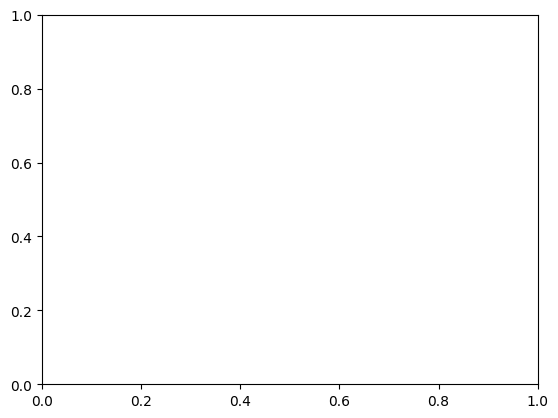

In [83]:
sns.countplot(x=df1.loc[isnull, 'isFraud'])


In [84]:
isnull = df1['id_15'] == 'Unknown'


<Axes: xlabel='isFraud', ylabel='count'>

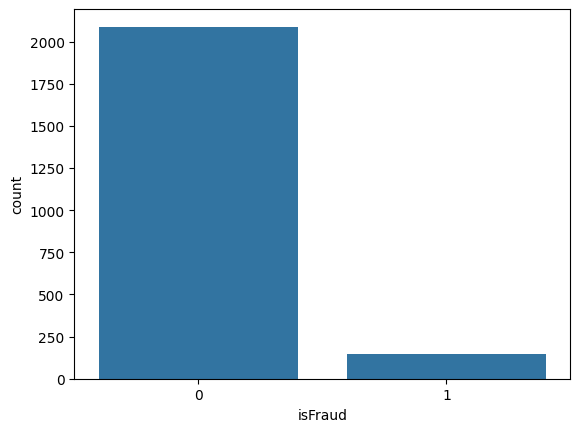

In [85]:
sns.countplot(x=df1.loc[isnull, 'isFraud'])


In [86]:
isnull = df1['id_15'] == 'New'


<Axes: xlabel='isFraud', ylabel='count'>

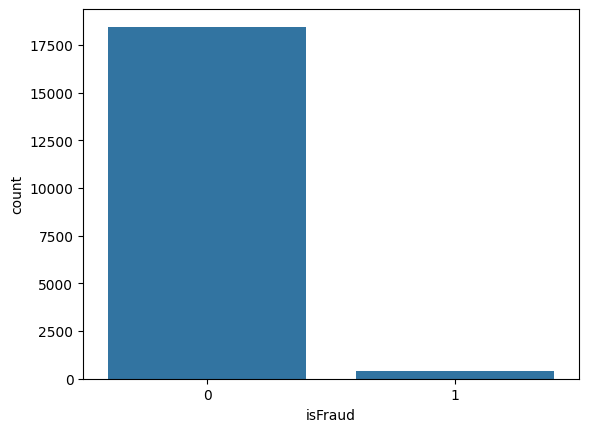

In [87]:
sns.countplot(x=df1.loc[isnull, 'isFraud'])


<Axes: xlabel='isFraud', ylabel='count'>

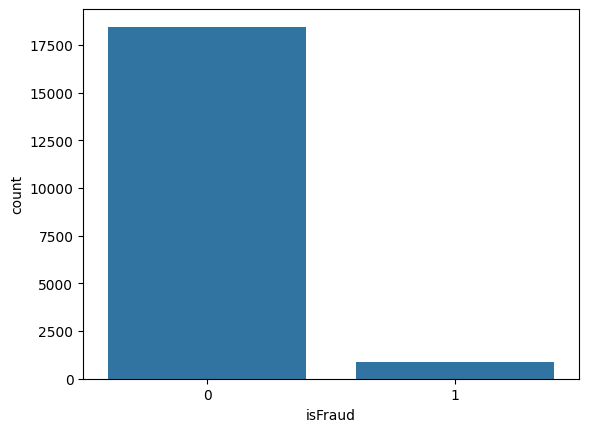

In [88]:
isnull = df1['id_15'] == 'Found'
sns.countplot(x=df1.loc[isnull, 'isFraud'])


In [89]:
df1['id_16']

,id_16
0,NaN
1,NaN
2,NaN
3,NaN
4,NotFound
...,...
99995,NaN
99996,NaN
99997,Found
99998,NotFound


In [90]:
isnull = df1['id_16'].isnull()
isnull

,id_16
0,True
1,True
2,True
3,True
4,False
...,...
99995,True
99996,True
99997,False
99998,False


<Axes: xlabel='isFraud', ylabel='count'>

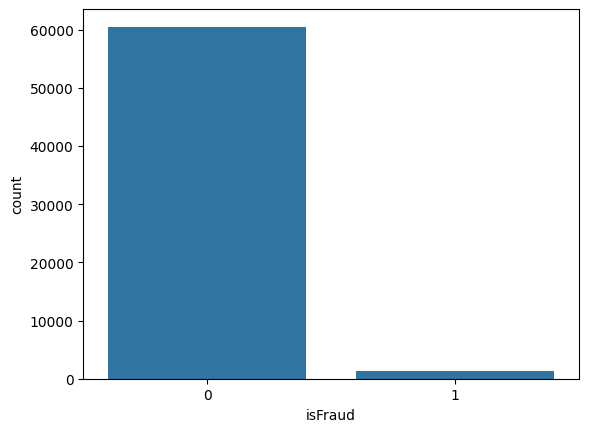

In [91]:
sns.countplot(x=df1.loc[isnull, 'isFraud'])

In [92]:
df1['id_16'].fillna('unknown', inplace=True)

In [93]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M4, Missing Values: 57.67%
Column: id_15, Missing Values: 59.60%
Column: id_28, Missing Values: 59.60%
Column: id_29, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: id_35, Missing Values: 59.60%
Column: id_36, Missing Values: 59.60%
Column: id_37, Missing Values: 59.60%
Column: id_38, Missing Values: 59.60%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [94]:
df1.id_28.unique()

array([nan, 'New', 'Found'], dtype=object)

In [95]:
df1.id_29.unique()

array([nan, 'NotFound', 'Found'], dtype=object)

In [96]:
df1.id_35.unique()

array([nan, 'T', 'F'], dtype=object)

In [97]:
df_id_cols = df1[['id_28', 'id_29', 'id_35', 'id_36','id_37', 'id_38']]

In [98]:
df1_id_cols = df_id_cols.fillna('unknown')

In [99]:
df1.drop(columns=['id_28', 'id_29', 'id_35', 'id_36','id_37', 'id_38'], inplace=True)

In [100]:
df1= pd.concat([df1, df1_id_cols], axis=1)

In [101]:
df1.id_29

,id_29
0,unknown
1,unknown
2,unknown
3,unknown
4,NotFound
...,...
99995,NotFound
99996,unknown
99997,Found
99998,NotFound


In [102]:
df1.id_35.unique()

array(['unknown', 'T', 'F'], dtype=object)

In [103]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: R_emaildomain, Missing Values: 65.45%
Column: M4, Missing Values: 57.67%
Column: id_15, Missing Values: 59.60%
Column: id_31, Missing Values: 59.76%
Column: DeviceType, Missing Values: 59.72%
Column: DeviceInfo, Missing Values: 63.53%


In [104]:
df1['DeviceType'].unique()

array([nan, 'mobile', 'desktop'], dtype=object)

In [105]:
obj_missing = df1[['R_emaildomain', 'M4','id_31','DeviceType', 'DeviceInfo']]

In [106]:
obj_filled =obj_missing.fillna('unknown')
obj_filled

,R_emaildomain,M4,id_31,DeviceType,DeviceInfo
0,unknown,M2,unknown,unknown,unknown
1,unknown,M0,unknown,unknown,unknown
2,unknown,M0,unknown,unknown,unknown
3,unknown,M0,unknown,unknown,unknown
4,unknown,unknown,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...
99995,gmail.com,M2,mobile safari uiwebview,mobile,unknown
99996,unknown,M0,unknown,unknown,unknown
99997,gmail.com,unknown,chrome 63.0,desktop,MacOS
99998,gmail.com,unknown,safari generic,desktop,MacOS


\

In [107]:
df1.drop(columns = ['R_emaildomain', 'M4','id_31','DeviceType', 'DeviceInfo'], inplace= True)

In [108]:
df1 = pd.concat([df1, obj_filled], axis=1)

In [109]:
df1.DeviceType.unique()

array(['unknown', 'mobile', 'desktop'], dtype=object)

<Axes: xlabel='isFraud', ylabel='count'>

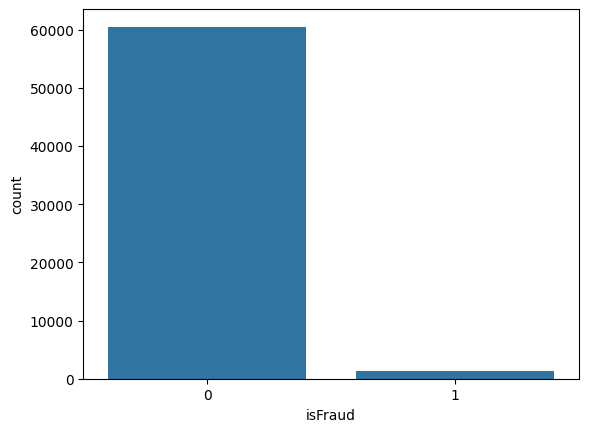

In [110]:
sns.countplot(x = df1.loc[isnull, 'isFraud'])

In [111]:
isdevice= df1['DeviceType'] =='mobile'

<Axes: xlabel='isFraud', ylabel='count'>

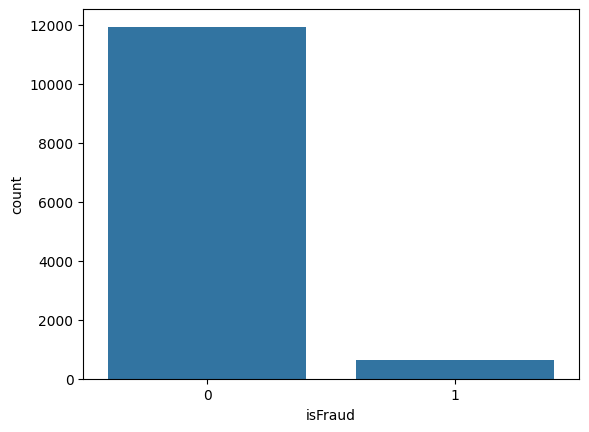

In [112]:
sns.countplot(x = df1.loc[isdevice, 'isFraud'])

In [113]:
isdevice= df1['DeviceType'] =='desktop'

<Axes: xlabel='isFraud', ylabel='count'>

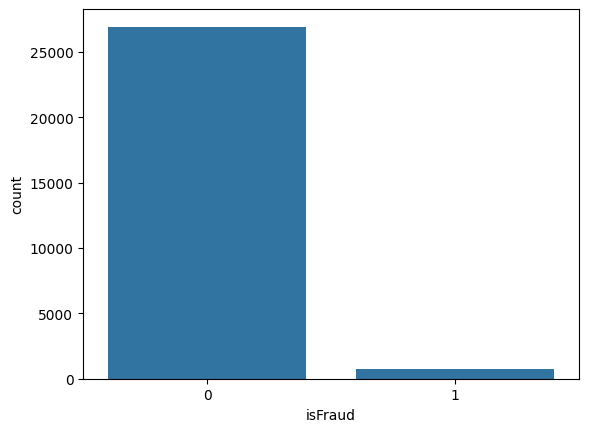

In [114]:
sns.countplot(x = df1.loc[isdevice, 'isFraud'])

In [115]:
null_percentage = df1.select_dtypes(include=['object']).isnull().sum() / len(df1) * 100

for col, count in null_percentage.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count:.2f}%")


Column: card6, Missing Values: 0.00%
Column: id_15, Missing Values: 59.60%


In [116]:
total_null = df1.isnull().sum()

for col, count in total_null.items():  # col = column name, count = number of nulls
    if count >0:
        print(f"Column: {col}, Missing Values: {count}")

Column: card6, Missing Values: 4
Column: dist1, Missing Values: 69653
Column: D2, Missing Values: 57633
Column: D3, Missing Values: 56598
Column: D4, Missing Values: 46175
Column: D5, Missing Values: 65327
Column: D10, Missing Values: 30926
Column: D15, Missing Values: 34047
Column: V12, Missing Values: 30933
Column: V13, Missing Values: 30933
Column: V14, Missing Values: 30933
Column: V15, Missing Values: 30933
Column: V16, Missing Values: 30933
Column: V17, Missing Values: 30933
Column: V18, Missing Values: 30933
Column: V19, Missing Values: 30933
Column: V20, Missing Values: 30933
Column: V21, Missing Values: 30933
Column: V22, Missing Values: 30933
Column: V23, Missing Values: 30933
Column: V24, Missing Values: 30933
Column: V25, Missing Values: 30933
Column: V26, Missing Values: 30933
Column: V27, Missing Values: 30933
Column: V28, Missing Values: 30933
Column: V29, Missing Values: 30933
Column: V30, Missing Values: 30933
Column: V31, Missing Values: 30933
Column: V32, Missing Val

In [117]:
len(non_obj_null)

371

In [118]:
df1[non_obj_null]

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,id_01,id_02,id_05,id_06,id_11,id_13,id_14,id_17,id_19,id_20
0,0,2987000,0,86400,68.500,13926,370.885976,150.0,142.0,315.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.000,2755,404.000000,150.0,102.0,325.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.000,4663,490.000000,150.0,166.0,330.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.000,18132,567.000000,150.0,117.0,476.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.000,4497,514.000000,150.0,102.0,420.000000,...,0.0,70787.0,NaN,NaN,100.0,NaN,-480.0,166.0,542.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,3086995,0,2005989,55.385,2256,545.000000,185.0,226.0,291.414663,...,-35.0,407847.0,-6.0,-7.0,100.0,49.0,NaN,225.0,345.0,507.0
99996,99996,3086996,0,2006074,117.000,2518,555.000000,150.0,226.0,512.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,3086997,0,2006135,50.000,2748,111.000000,150.0,228.0,441.000000,...,0.0,60547.0,0.0,0.0,100.0,NaN,-300.0,166.0,312.0,161.0
99998,99998,3086998,0,2006177,100.000,16075,514.000000,150.0,102.0,299.000000,...,-5.0,179805.0,0.0,-1.0,100.0,49.0,-480.0,166.0,312.0,222.0


In [119]:
df1.drop(columns= ['Unnamed: 0'], inplace=True)

In [120]:
# df1[non_obj_null].value_counts()

In [121]:
non_obj_null = df1.select_dtypes(exclude=['object']).columns
not_unique=df1[non_obj_null].nunique()
for x in not_unique.index:
  if not_unique[x] > 1:
    print({x}, {not_unique[x]})

{'TransactionID'} {100000}
{'isFraud'} {2}
{'TransactionDT'} {96144}
{'TransactionAmt'} {6387}
{'card1'} {7677}
{'card2'} {500}
{'card3'} {75}
{'card5'} {88}
{'addr1'} {265}
{'addr2'} {44}
{'dist1'} {1641}
{'C1'} {1468}
{'C2'} {894}
{'C3'} {8}
{'C4'} {1174}
{'C5'} {250}
{'C6'} {1246}
{'C7'} {1070}
{'C8'} {1141}
{'C9'} {168}
{'C10'} {1068}
{'C11'} {1352}
{'C12'} {1108}
{'C13'} {1473}
{'C14'} {1061}
{'D1'} {601}
{'D2'} {599}
{'D3'} {493}
{'D4'} {605}
{'D5'} {520}
{'D10'} {603}
{'D15'} {636}
{'V12'} {4}
{'V13'} {6}
{'V14'} {2}
{'V15'} {8}
{'V16'} {15}
{'V17'} {16}
{'V18'} {16}
{'V19'} {8}
{'V20'} {15}
{'V21'} {6}
{'V22'} {9}
{'V23'} {14}
{'V24'} {14}
{'V25'} {7}
{'V26'} {13}
{'V27'} {4}
{'V28'} {4}
{'V29'} {5}
{'V30'} {6}
{'V31'} {8}
{'V32'} {15}
{'V33'} {7}
{'V34'} {13}
{'V35'} {4}
{'V36'} {5}
{'V37'} {16}
{'V38'} {24}
{'V39'} {11}
{'V40'} {11}
{'V41'} {2}
{'V42'} {5}
{'V43'} {7}
{'V44'} {15}
{'V45'} {26}
{'V46'} {5}
{'V47'} {7}
{'V48'} {4}
{'V49'} {6}
{'V50'} {6}
{'V51'} {5}
{'V52'} {7}

In [122]:
{col: df1[col].value_counts() for col in df1[non_obj_null]}

{'TransactionID': TransactionID
 2987000    1
 3053650    1
 3053672    1
 3053671    1
 3053670    1
           ..
 3020331    1
 3020330    1
 3020329    1
 3020328    1
 3086999    1
 Name: count, Length: 100000, dtype: int64,
 'isFraud': isFraud
 0    97439
 1     2561
 Name: count, dtype: int64,
 'TransactionDT': TransactionDT
 1544629    4
 1962054    4
 1971839    4
 1888736    3
 1625915    3
           ..
 841451     1
 841449     1
 841437     1
 841431     1
 2006364    1
 Name: count, Length: 96144, dtype: int64,
 'TransactionAmt': TransactionAmt
 100.000     8537
 50.000      7467
 117.000     3164
 150.000     3162
 25.000      3157
             ... 
 1223.990       1
 1651.950       1
 583.880        1
 497.700        1
 28.858         1
 Name: count, Length: 6387, dtype: int64,
 'card1': card1
 7919     2097
 6019     2017
 9500     2002
 15885    1705
 17188    1651
          ... 
 12028       1
 10794       1
 5715        1
 6776        1
 12478       1
 Name: count, 

In [123]:
df1.V240.value_counts()

,count
V240,
1.0,38366
2.0,23
5.0,2
6.0,1


In [124]:
V204null= df1['V240'].isnull()

<Axes: xlabel='isFraud', ylabel='count'>

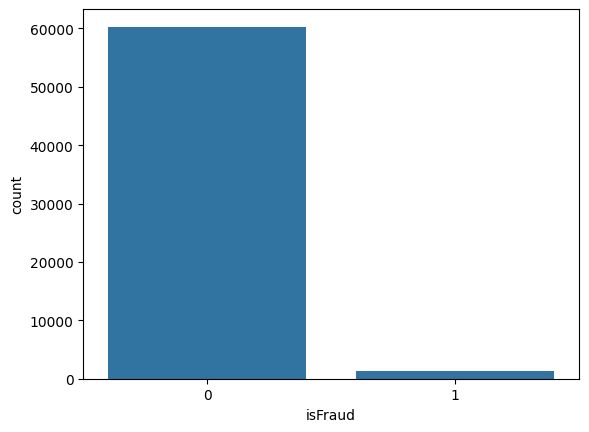

In [125]:
sns.countplot(x = df1.loc[V204null, 'isFraud'])

In [126]:
df1_obj = df1.select_dtypes(include=['object'])

commented lines are previous attempts to experiment


In [127]:
# df1_copy = df1.copy()

In [128]:
# df1_noobj = df1_copy.select_dtypes(exclude=['object'])

In [129]:
# df1.copy()

In [130]:

# df1_copy_obj= df1_copy.select_dtypes(exclude=['object'])

In [131]:

# df1_copy.reset_index(drop=True, inplace=True)

# # from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# scaled_data = pd.DataFrame(scalar.fit_transform(df1_copy_obj), columns=df1_copy_obj.columns)

In [132]:
# df_partial

In [133]:
# import pandas as pd

# num_samples = 5  # Number of different samples
# sample_size = 2000  # Each sample has 2K rows

# samples = []  # List to store samples

# for i in range(num_samples):
#     df_sample = df1_copy_obj.sample(n=sample_size, random_state=i)  # Change random_state for different samples
#     df_sample.fillna(df_sample.mean(), inplace=True)  # Fill missing values
#     samples.append(df_sample)


In [134]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from collections import Counter

# # Define parameters
# num_samples = 5  # Number of samples
# sample_size = 2000  # Each sample has 2K rows
# num_components = 10  # Number of principal components to keep

# # List to store selected important features from each sample
# selected_features_list = []

# for i in range(num_samples):
#     print(f"Processing Sample {i+1}...")

#     # Step 1: Take a random sample
#     df_sample = df1_copy_obj.sample(n=sample_size, random_state=i)

#     # Step 2: Drop columns with too many missing values (e.g., >60%)
#     threshold = 0.6 * len(df_sample)
#     df_sample = df_sample.dropna(axis=1, thresh=threshold)

#     # Step 3: Fill remaining NaNs with column mean (for numeric data)
#     df_sample = df_sample.fillna(df_sample.mean())

#     # Step 4: Select only numeric columns for PCA


#     # Step 5: Standardize the data
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_sample)

#     # Step 6: Apply PCA
#     pca = PCA(n_components=num_components)
#     pca.fit(scaled_data)

#     # Step 7: Identify the most important features (based on PCA component loadings)
#     feature_importance = np.abs(pca.components_).sum(axis=0)
#     top_features = df_sample.columns[np.argsort(feature_importance)[-10:]]  # Top 10 important features

#     selected_features_list.extend(top_features)

# # Step 8: Summarize feature importance across all samples
# feature_counts = Counter(selected_features_list)
# common_features = feature_counts.most_common(15)  # Top 15 most frequently selected features

# # Display results
# print("\n🔹 Most Important Features Across All Samples:")
# for feature, count in common_features:
#     print(f"{feature}: Selected in {count}/{num_samples} samples")


In [135]:
# df1_copy_obj.V282.unique()

In [136]:

# important_features = [feature for feature, count in common_features]
# print(important_features)


In [137]:
# df_sample = df1_copy_obj[important_features]

In [138]:
# df_sample = df_sample.fillna(df_sample.mean())

In [139]:
# df_sample = pd.concat([df_sample, df1['isFraud']], axis=1)

In [140]:
fraud_corr = df1[non_obj_null].corr()

In [141]:
fraud_important_feature = fraud_corr['isFraud'].abs().sort_values(ascending=False)

In [142]:
fraud_important_feature

,isFraud
isFraud,1.000000
V201,0.340504
V189,0.317358
V200,0.298870
V257,0.289347
...,...
V339,0.000313
V337,0.000082
V225,0.000026
V333,0.000005


In [143]:
for col, count in fraud_important_feature.items():  # col = column name, count = number of nulls
        print(f"Column: {col}, Correlation Values: {count:.6f}")

Column: isFraud, Correlation Values: 1.000000
Column: V201, Correlation Values: 0.340504
Column: V189, Correlation Values: 0.317358
Column: V200, Correlation Values: 0.298870
Column: V257, Correlation Values: 0.289347
Column: V45, Correlation Values: 0.275433
Column: V188, Correlation Values: 0.270014
Column: V156, Correlation Values: 0.250835
Column: V246, Correlation Values: 0.249517
Column: V149, Correlation Values: 0.238343
Column: V44, Correlation Values: 0.234892
Column: V158, Correlation Values: 0.232770
Column: V171, Correlation Values: 0.232347
Column: V244, Correlation Values: 0.232292
Column: V87, Correlation Values: 0.218523
Column: V242, Correlation Values: 0.215373
Column: V233, Correlation Values: 0.214697
Column: V198, Correlation Values: 0.214386
Column: V155, Correlation Values: 0.210177
Column: V52, Correlation Values: 0.204990
Column: V231, Correlation Values: 0.200450
Column: V86, Correlation Values: 0.196306
Column: V148, Correlation Values: 0.195142
Column: V157,

In [144]:
len(fraud_important_feature)

370

In [145]:
fraud_relevant_features = fraud_important_feature[fraud_important_feature > 0.1].index

In [146]:
df1_selected = df1[fraud_relevant_features]

In [147]:
df1.V201.unique()

array([nan,  1.,  2.,  0.,  3.,  4.,  8.,  9.,  5.,  6.,  7., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28.])

In [148]:
skewed_df = df1_selected.skew()
skewed_df

,0
isFraud,6.006214
V201,14.013627
V189,14.008308
V200,16.152593
V257,11.369598
...,...
V90,0.831402
V63,2.343082
V185,7.664261
V49,1.169217


In [149]:
for col, count in skewed_df.items():  # col = column name, count = number of nulls
        print(f"Column: {col}, Skewed Values: {count:.6f}")

Column: isFraud, Skewed Values: 6.006214
Column: V201, Skewed Values: 14.013627
Column: V189, Skewed Values: 14.008308
Column: V200, Skewed Values: 16.152593
Column: V257, Skewed Values: 11.369598
Column: V45, Skewed Values: 15.578960
Column: V188, Skewed Values: 14.036800
Column: V156, Skewed Values: 1.175307
Column: V246, Skewed Values: 13.520340
Column: V149, Skewed Values: 0.962583
Column: V44, Skewed Values: 9.989354
Column: V158, Skewed Values: 1.812276
Column: V171, Skewed Values: 6.056914
Column: V244, Skewed Values: 15.444646
Column: V87, Skewed Values: 10.263006
Column: V242, Skewed Values: 15.690679
Column: V233, Skewed Values: 8.315946
Column: V198, Skewed Values: 7.768937
Column: V155, Skewed Values: 0.556048
Column: V52, Skewed Values: 2.476483
Column: V231, Skewed Values: 8.032699
Column: V86, Skewed Values: 13.799046
Column: V148, Skewed Values: 0.313295
Column: V157, Skewed Values: 1.181382
Column: V197, Skewed Values: 1.740471
Column: id_17, Skewed Values: 0.979030
Co

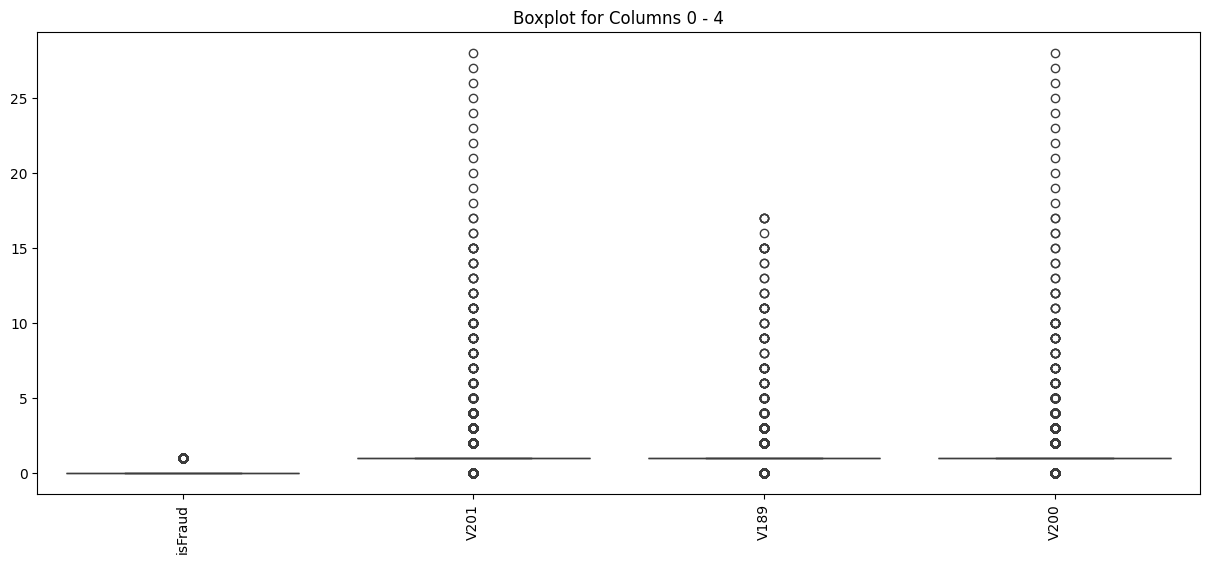

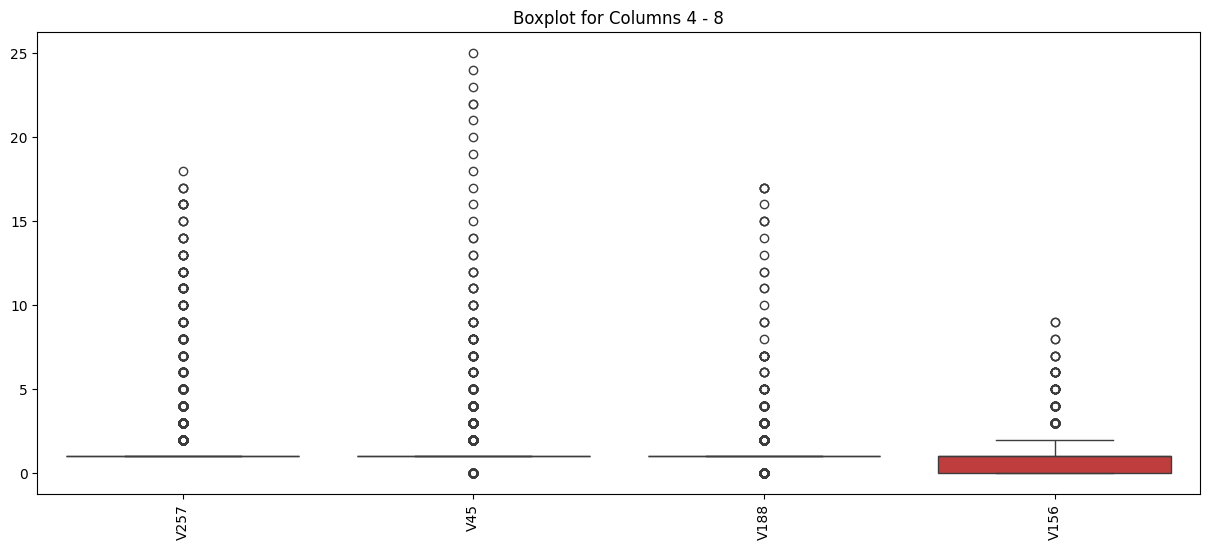

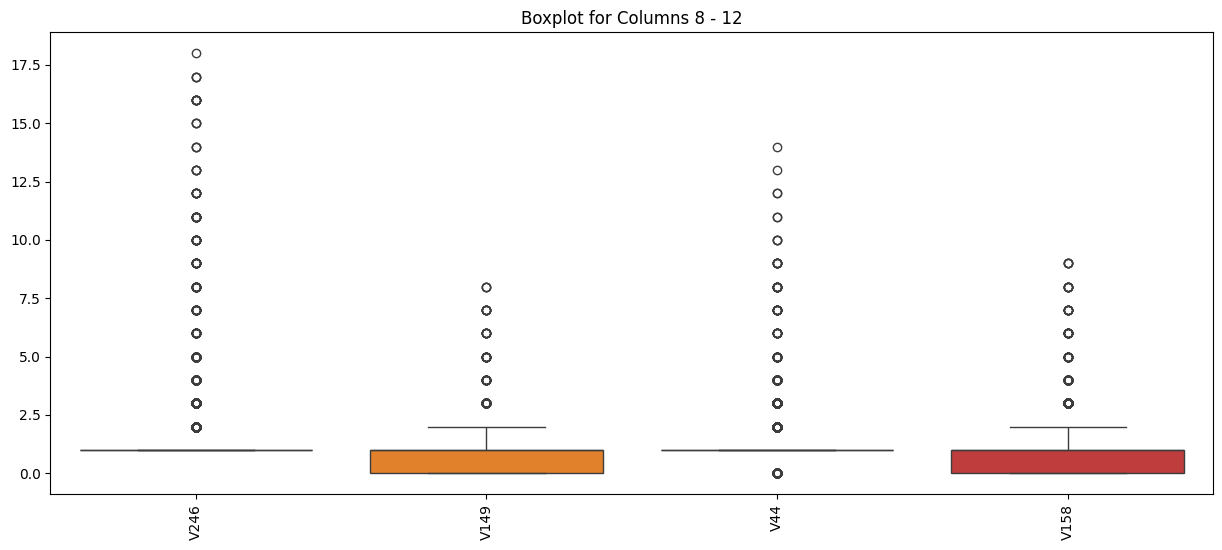

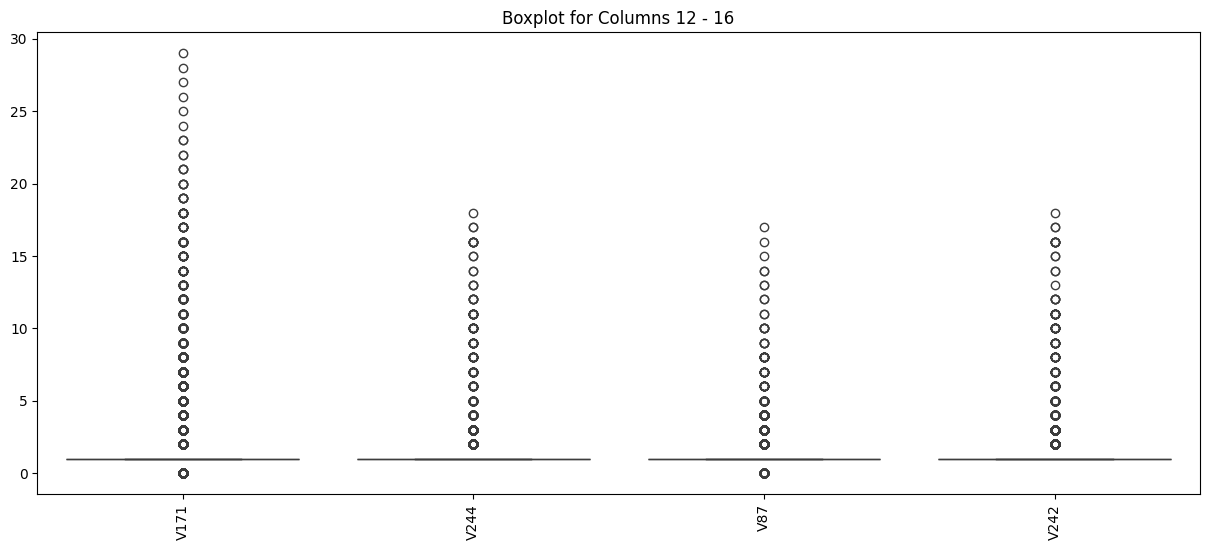

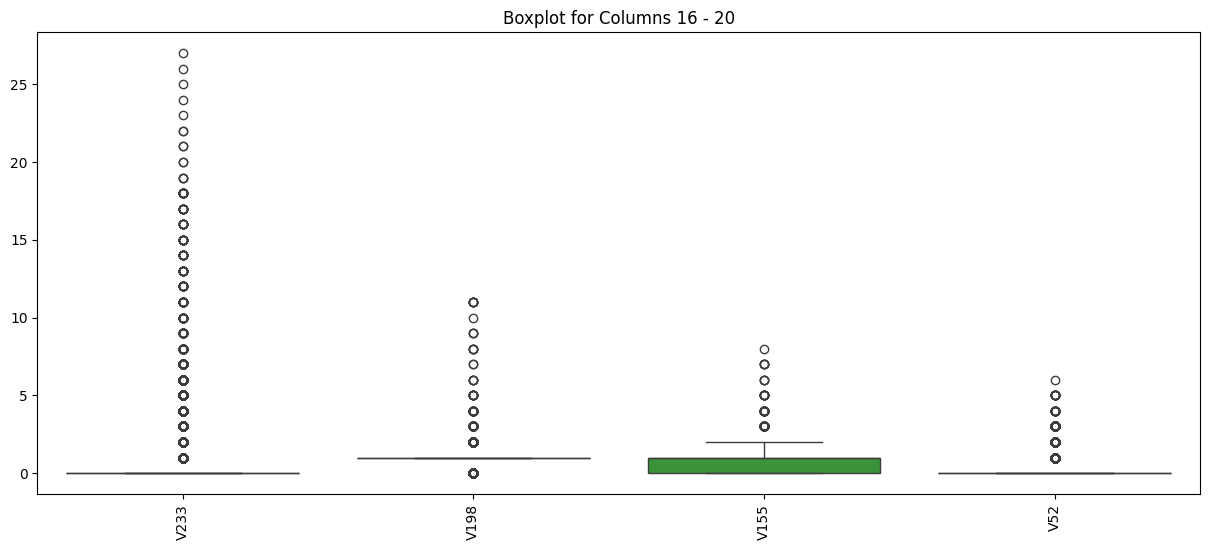

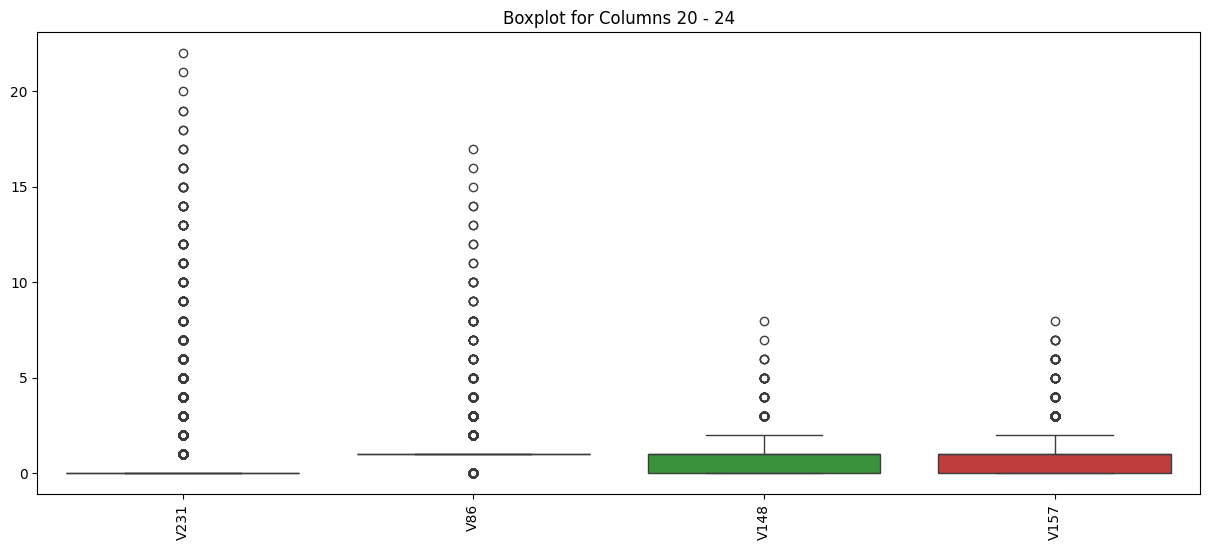

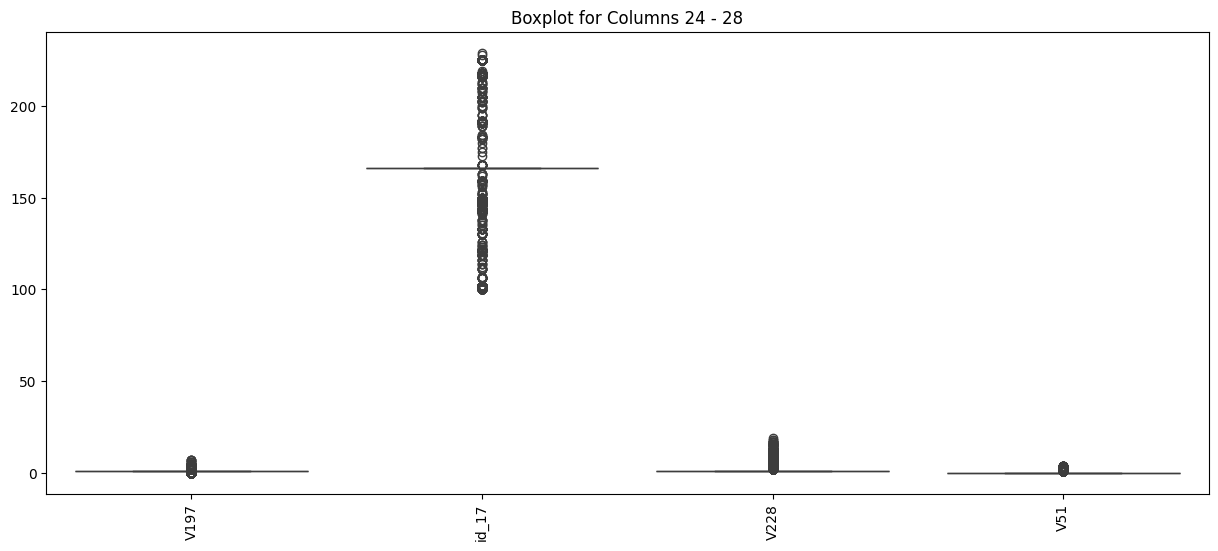

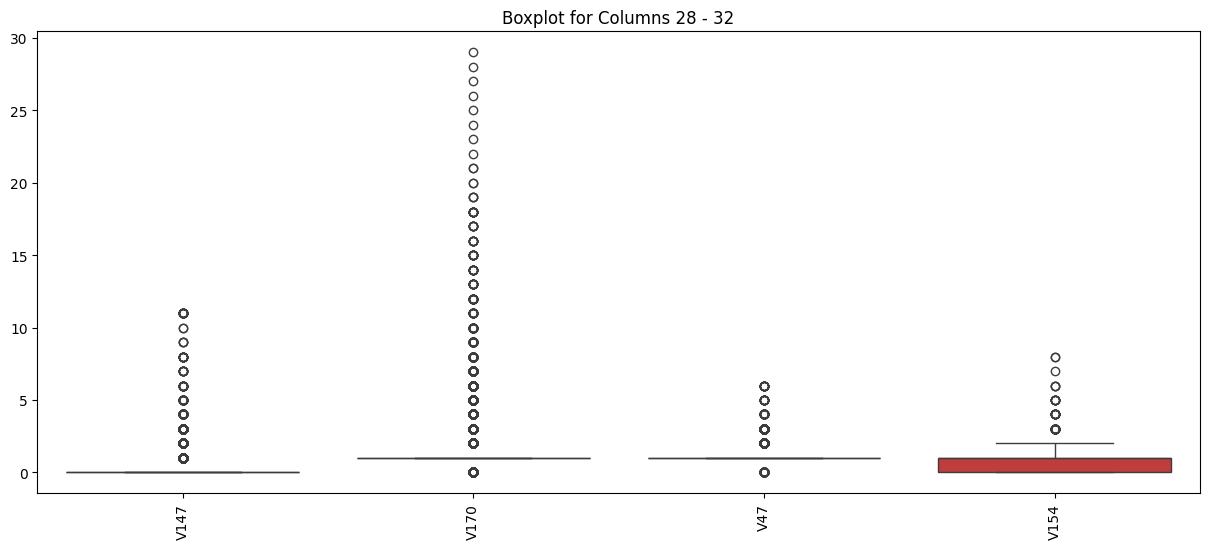

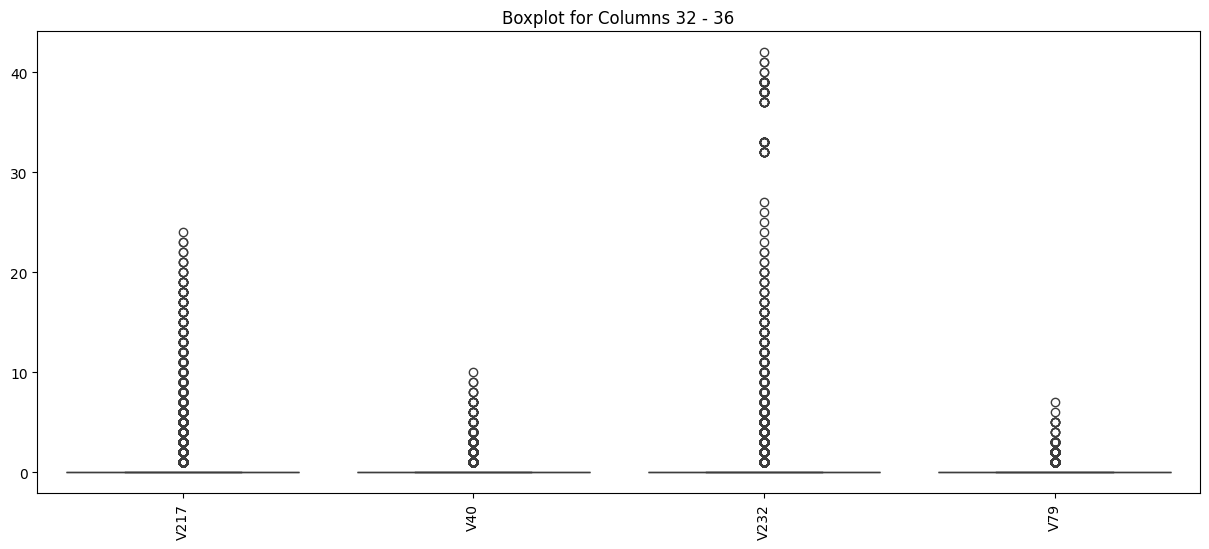

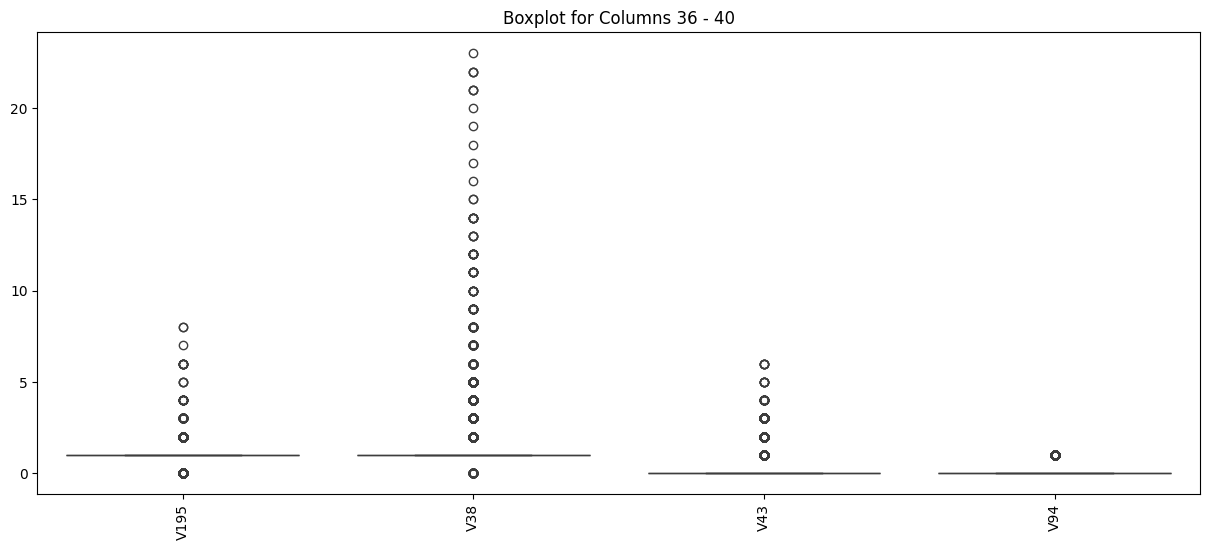

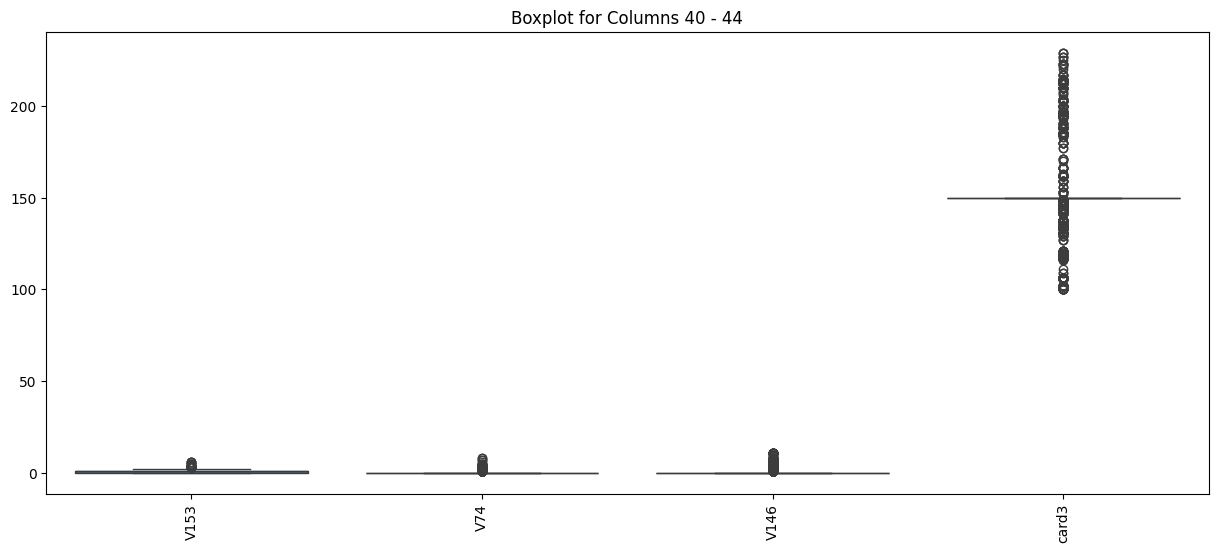

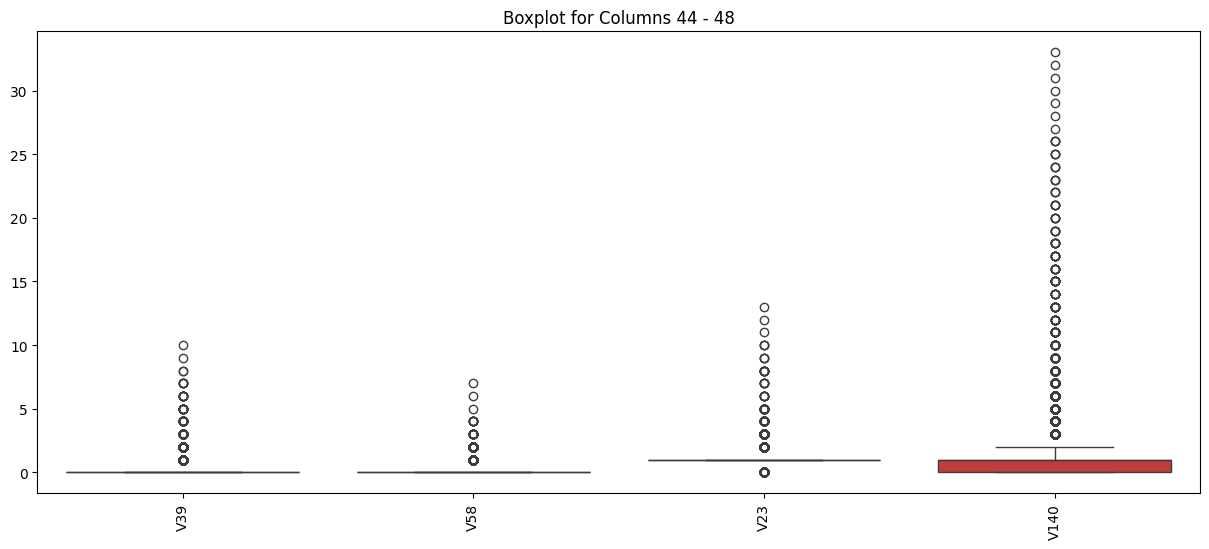

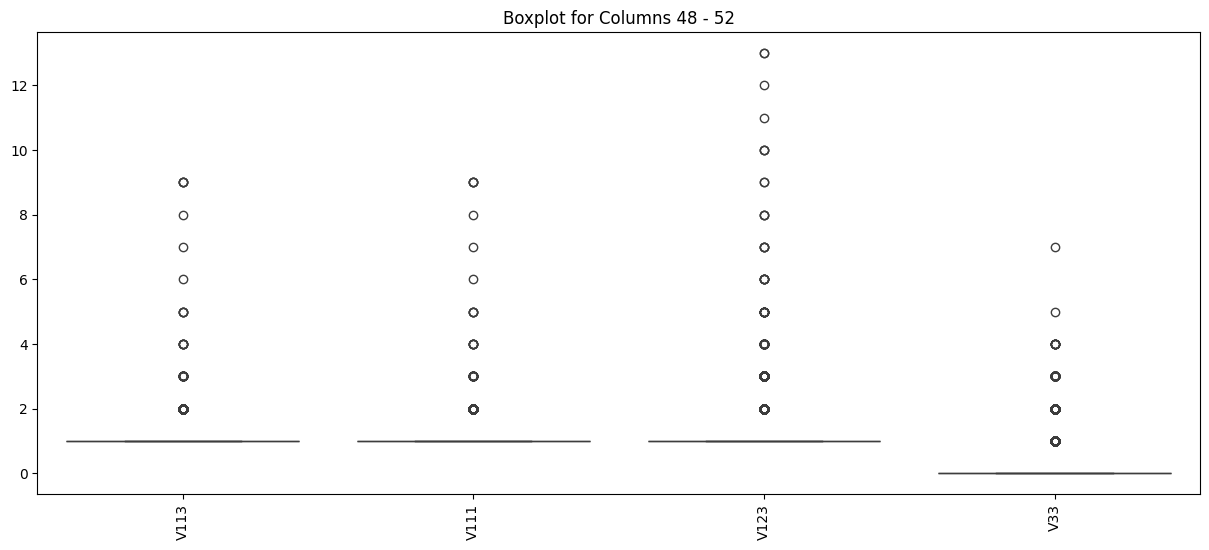

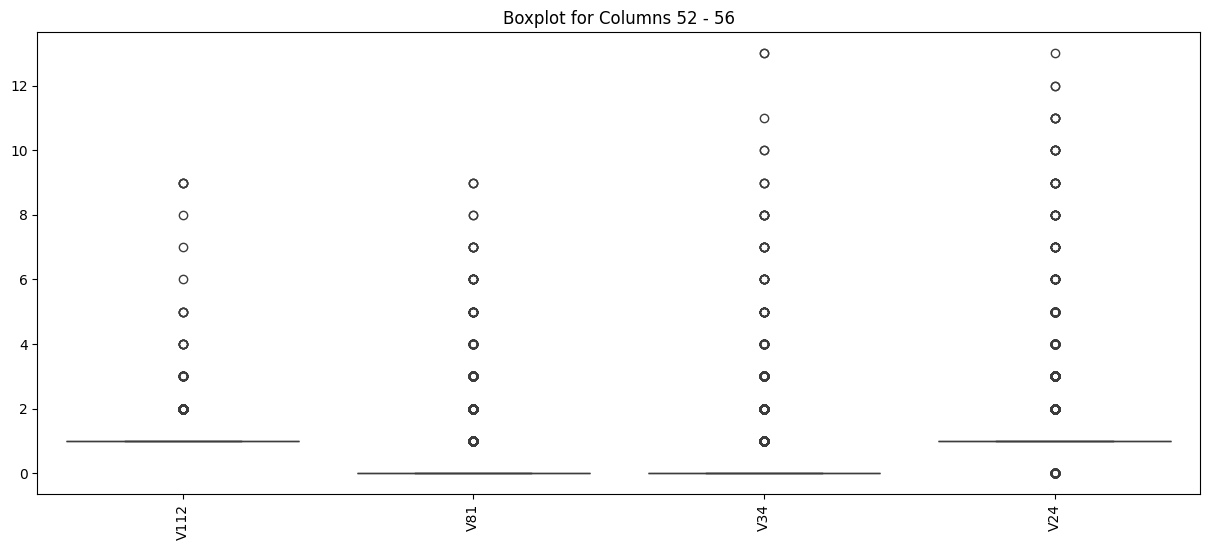

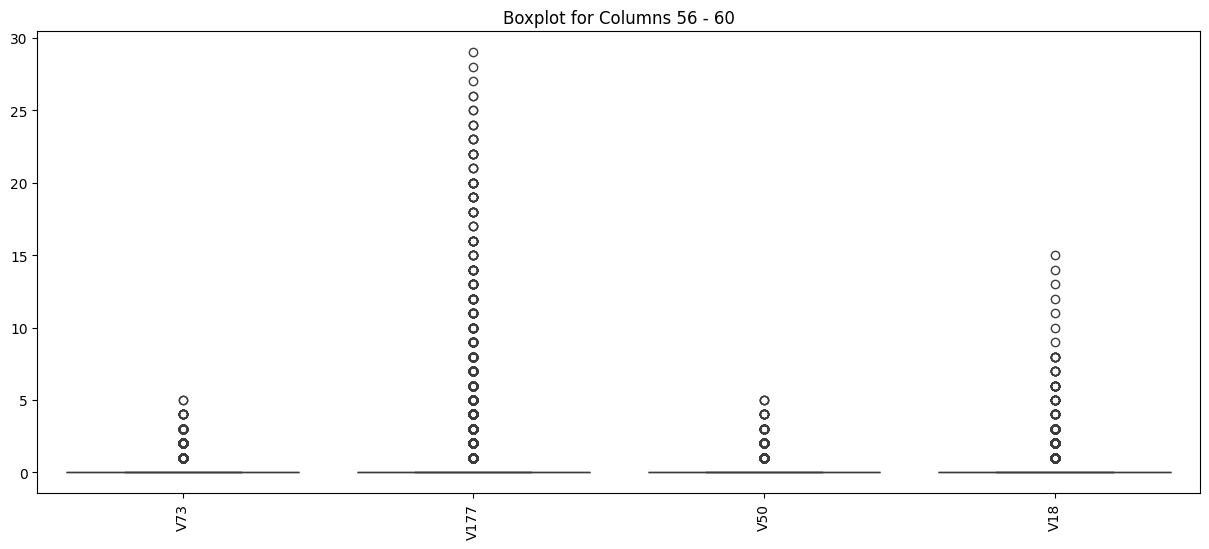

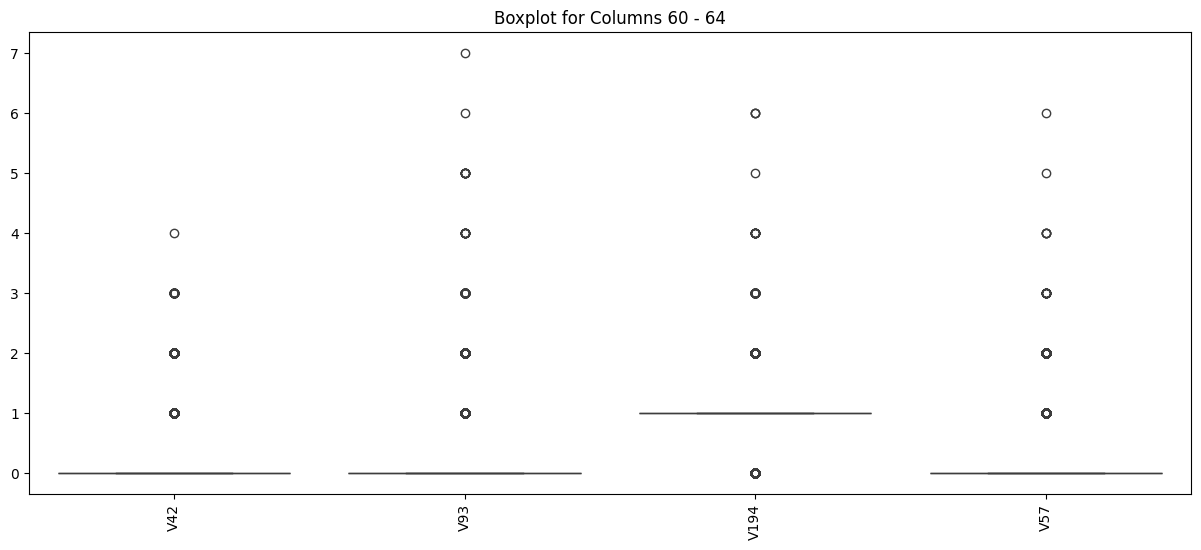

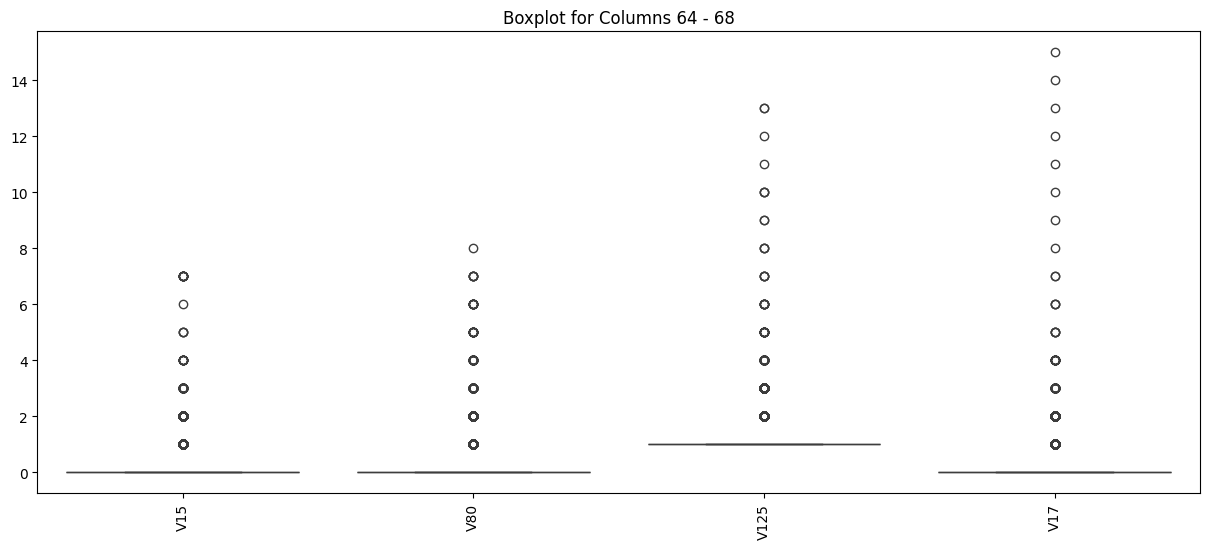

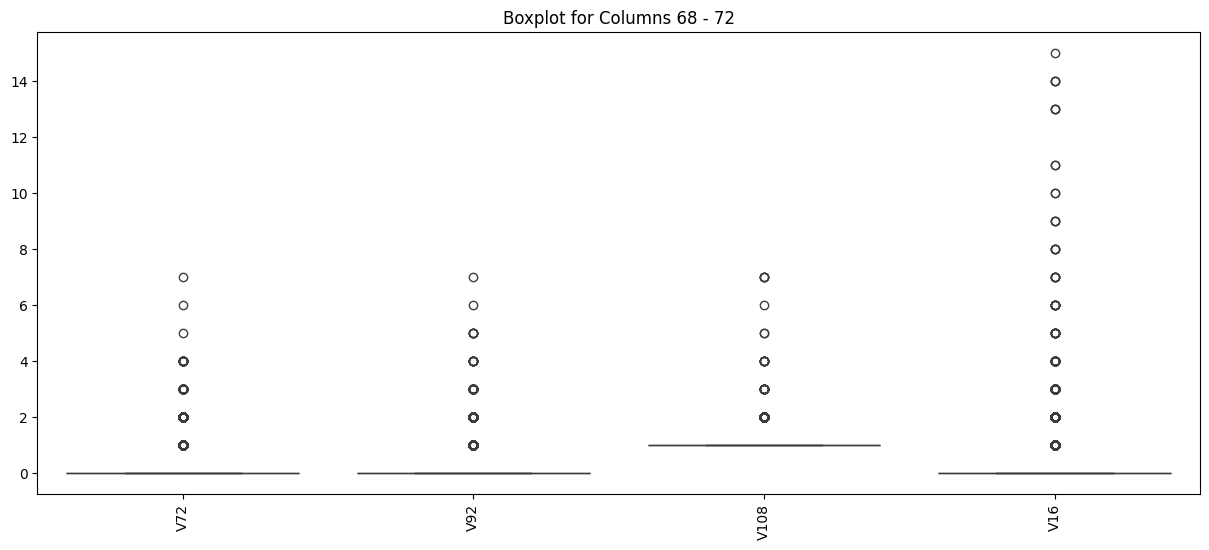

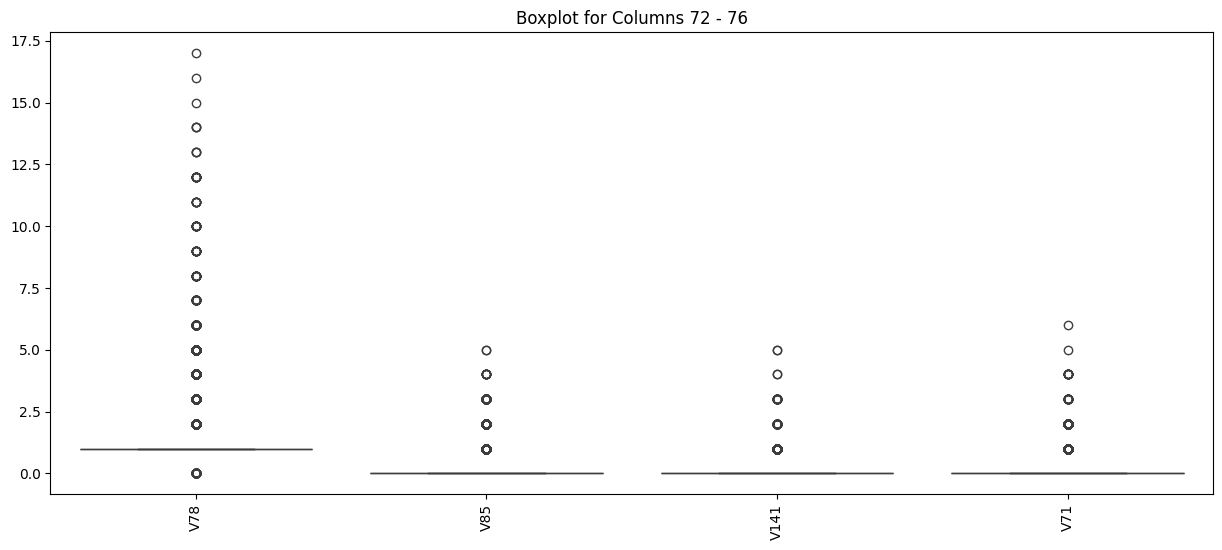

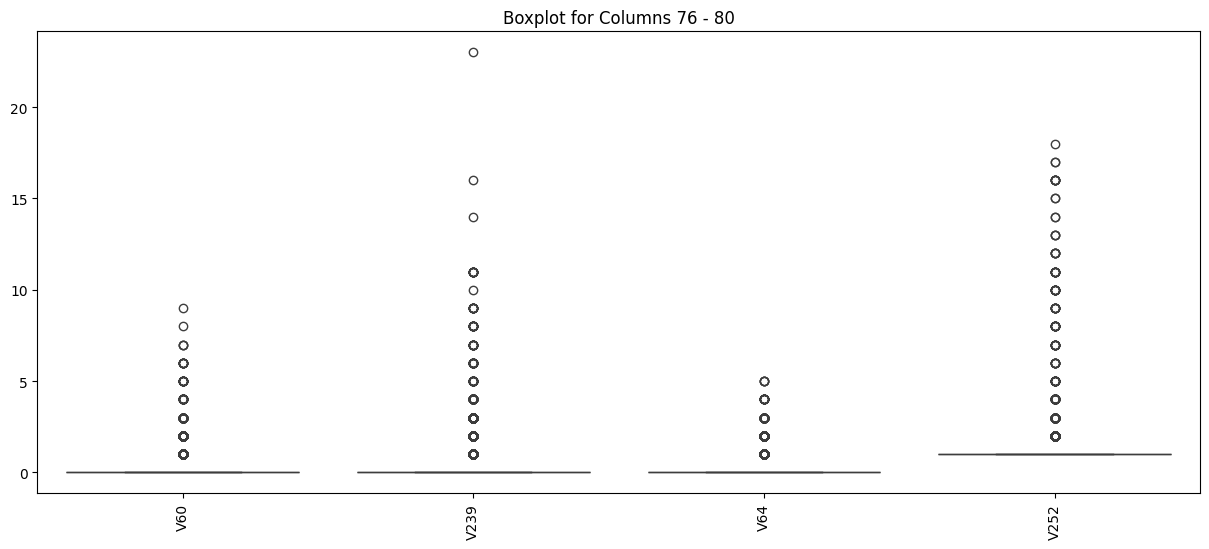

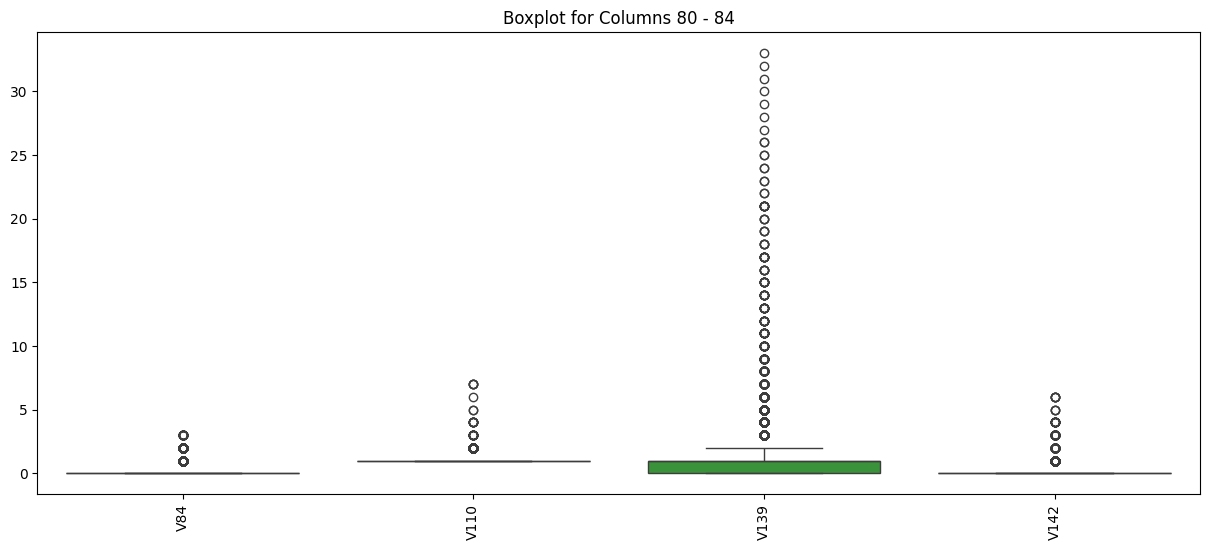

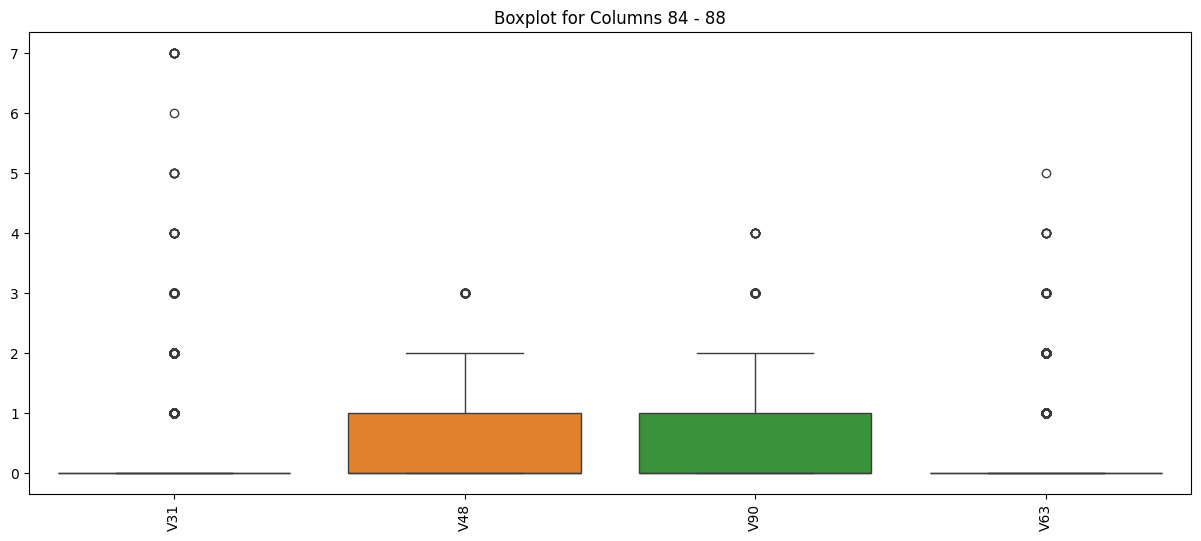

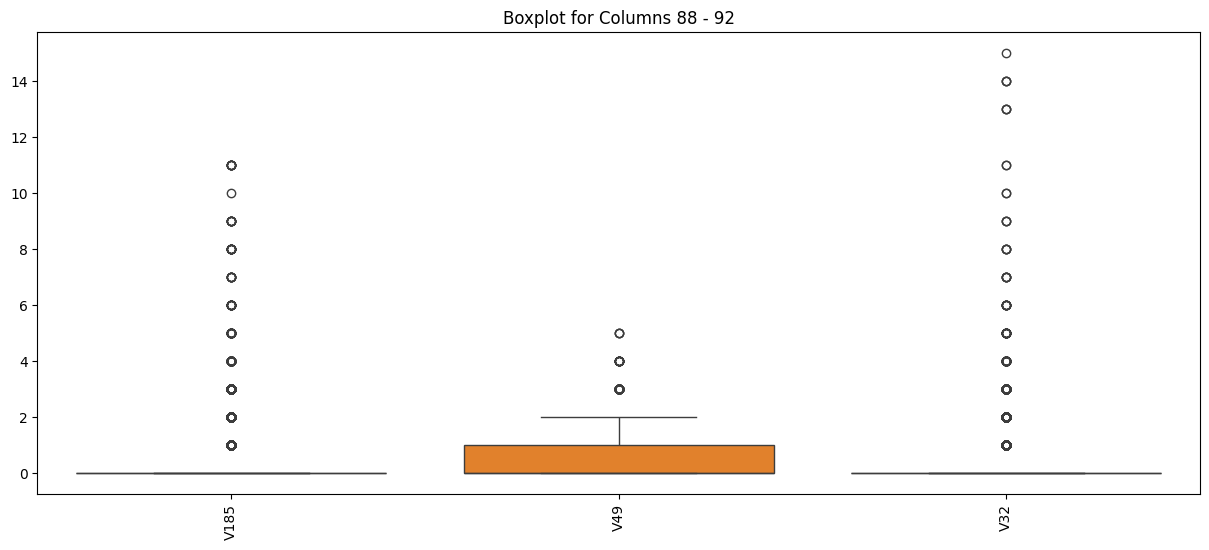

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = df1_selected.shape[1]
cols_per_plot = 4  # Adjust based on screen size

for i in range(0, num_cols, cols_per_plot):
    subset = df1_selected.iloc[:, i:i+cols_per_plot]  # Select 10 columns at a time

    plt.figure(figsize=(15, 6))
    sns.boxplot(data=subset)
    plt.xticks(rotation=90)  # Rotate column names
    plt.title(f'Boxplot for Columns {i} - {i+cols_per_plot}')
    plt.show()


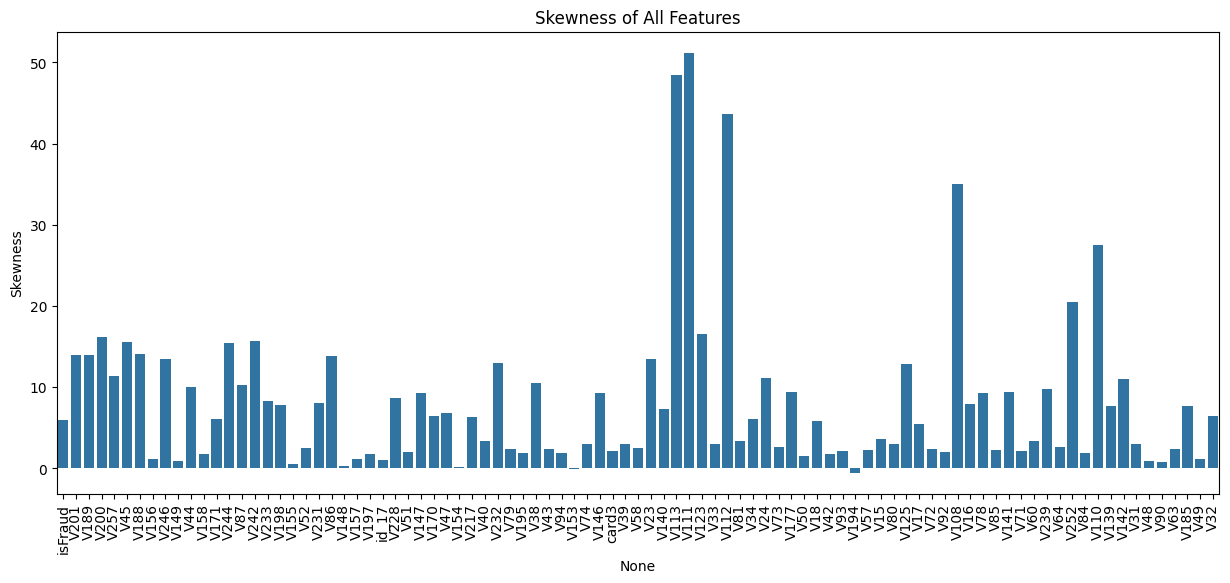

In [151]:
plt.figure(figsize=(15, 6))
sns.barplot(x=skewed_df.index, y=skewed_df.values)
plt.xticks(rotation=90)
plt.ylabel('Skewness')
plt.title('Skewness of All Features')
plt.show()


In [152]:
df1_selected.head()

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0
1,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [153]:
missing_selected = df1_selected.isnull().sum() / len(df1_selected) * 100
missing_selected

,0
isFraud,0.000
V201,60.417
V189,60.417
V200,60.417
V257,61.608
...,...
V90,34.052
V63,30.239
V185,60.417
V49,46.178


In [154]:
for col, count in missing_selected.items():  # col = column name, count = number of nulls
        print(f"Column: {col}, Missing Values: {count:.2f} %")

Column: isFraud, Missing Values: 0.00 %
Column: V201, Missing Values: 60.42 %
Column: V189, Missing Values: 60.42 %
Column: V200, Missing Values: 60.42 %
Column: V257, Missing Values: 61.61 %
Column: V45, Missing Values: 46.18 %
Column: V188, Missing Values: 60.42 %
Column: V156, Missing Values: 68.36 %
Column: V246, Missing Values: 61.61 %
Column: V149, Missing Values: 68.36 %
Column: V44, Missing Values: 46.18 %
Column: V158, Missing Values: 68.36 %
Column: V171, Missing Values: 60.42 %
Column: V244, Missing Values: 61.61 %
Column: V87, Missing Values: 34.05 %
Column: V242, Missing Values: 61.61 %
Column: V233, Missing Values: 61.61 %
Column: V198, Missing Values: 60.42 %
Column: V155, Missing Values: 68.36 %
Column: V52, Missing Values: 46.18 %
Column: V231, Missing Values: 61.61 %
Column: V86, Missing Values: 34.05 %
Column: V148, Missing Values: 68.36 %
Column: V157, Missing Values: 68.36 %
Column: V197, Missing Values: 60.42 %
Column: id_17, Missing Values: 60.12 %
Column: V228, 

In [155]:
totalnull_numeric_column = df1[non_obj_null].isnull().sum() / len(df1[non_obj_null]) *100

In [156]:
for col, count in totalnull_numeric_column.items():  # col = column name, count = number of nulls
        print(f"Column: {col}, Missing Values: {count: .2f}%")

Column: TransactionID, Missing Values:  0.00%
Column: isFraud, Missing Values:  0.00%
Column: TransactionDT, Missing Values:  0.00%
Column: TransactionAmt, Missing Values:  0.00%
Column: card1, Missing Values:  0.00%
Column: card2, Missing Values:  0.00%
Column: card3, Missing Values:  0.00%
Column: card5, Missing Values:  0.00%
Column: addr1, Missing Values:  0.00%
Column: addr2, Missing Values:  0.00%
Column: dist1, Missing Values:  69.65%
Column: C1, Missing Values:  0.00%
Column: C2, Missing Values:  0.00%
Column: C3, Missing Values:  0.00%
Column: C4, Missing Values:  0.00%
Column: C5, Missing Values:  0.00%
Column: C6, Missing Values:  0.00%
Column: C7, Missing Values:  0.00%
Column: C8, Missing Values:  0.00%
Column: C9, Missing Values:  0.00%
Column: C10, Missing Values:  0.00%
Column: C11, Missing Values:  0.00%
Column: C12, Missing Values:  0.00%
Column: C13, Missing Values:  0.00%
Column: C14, Missing Values:  0.00%
Column: D1, Missing Values:  0.00%
Column: D2, Missing Valu

to move this to my note: if a feature as a large outliers ie long tails then it nan values should be filled with median

if its evenly distributed use mean and mode for categorical data


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df1_selected)
plt.show()
 using x works for columns while 'data=' work for multiple columns


In [157]:
df2_selected = df1_selected.fillna(df1_selected.median())

In [158]:
df2_selected.head()

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df1_selected.nunique()

,0
isFraud,2
V201,29
V189,18
V200,29
V257,18
...,...
V90,5
V63,6
V185,12
V49,6


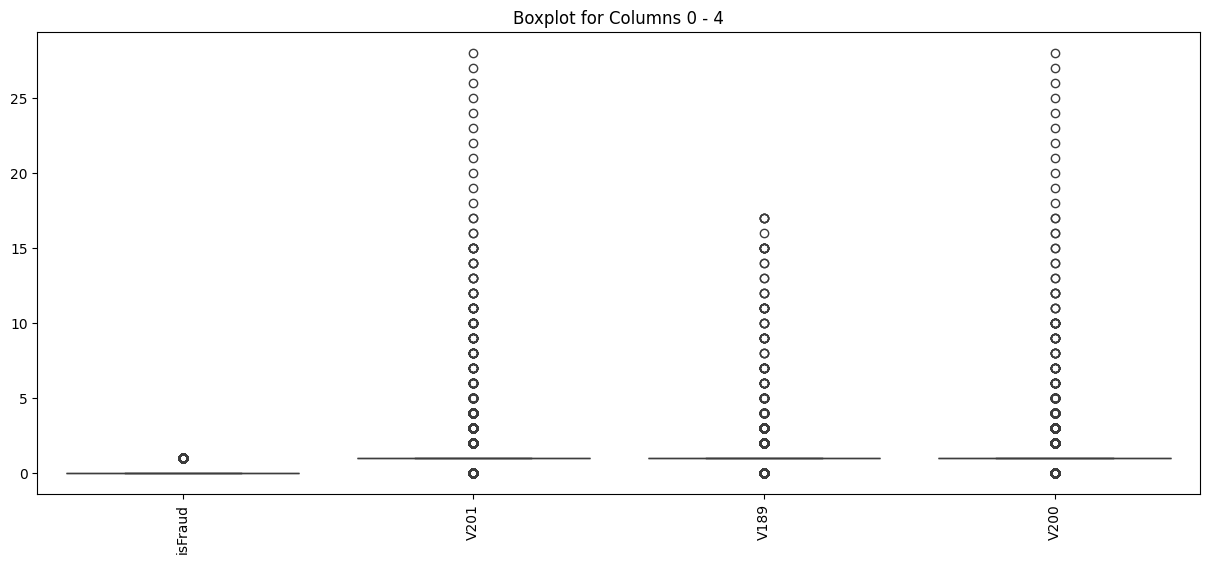

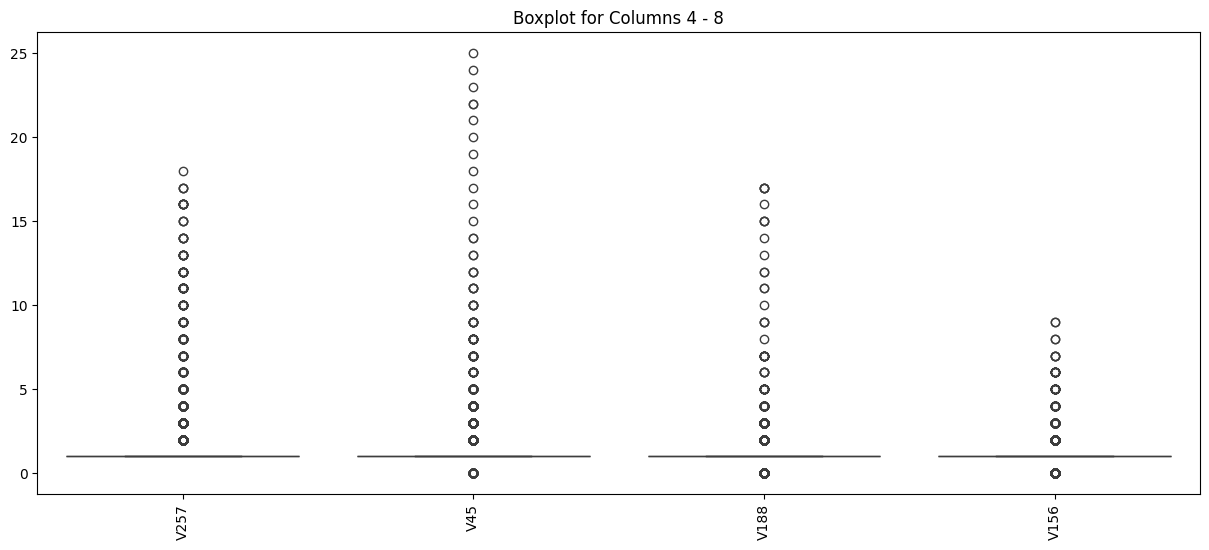

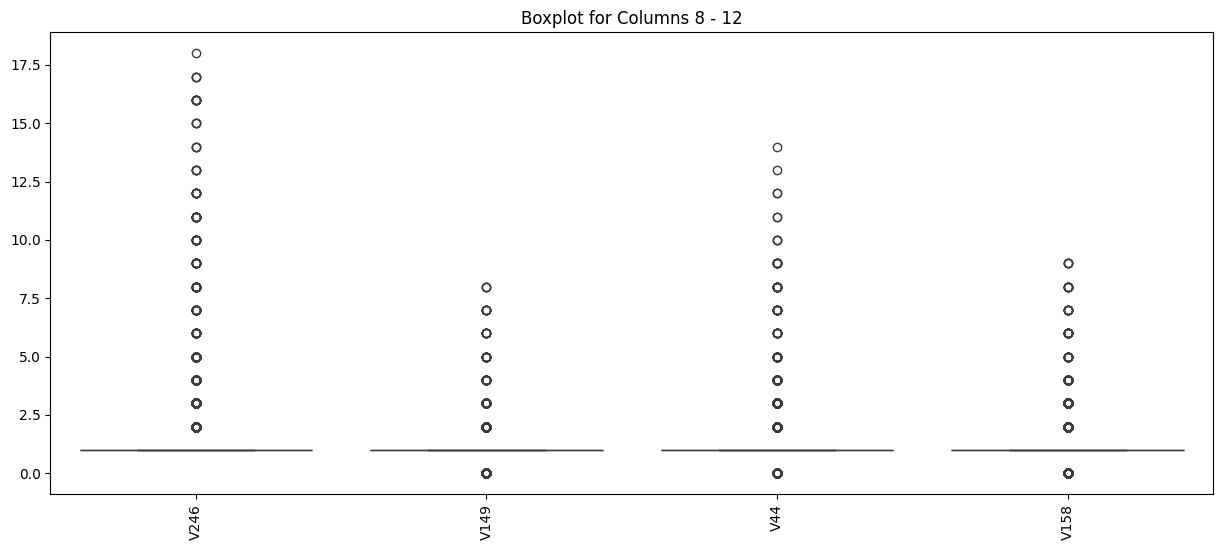

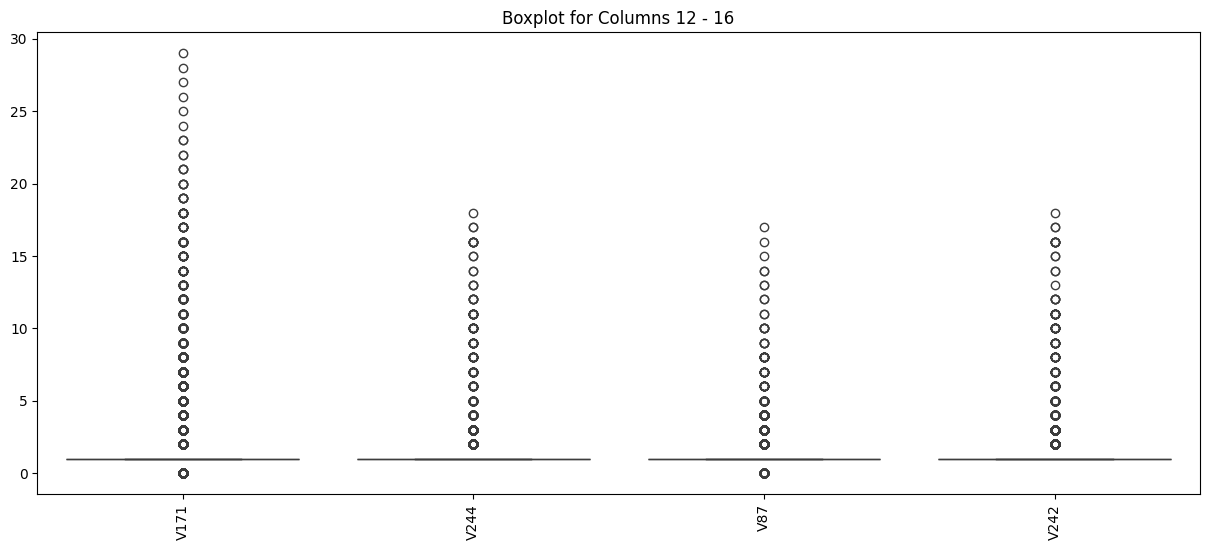

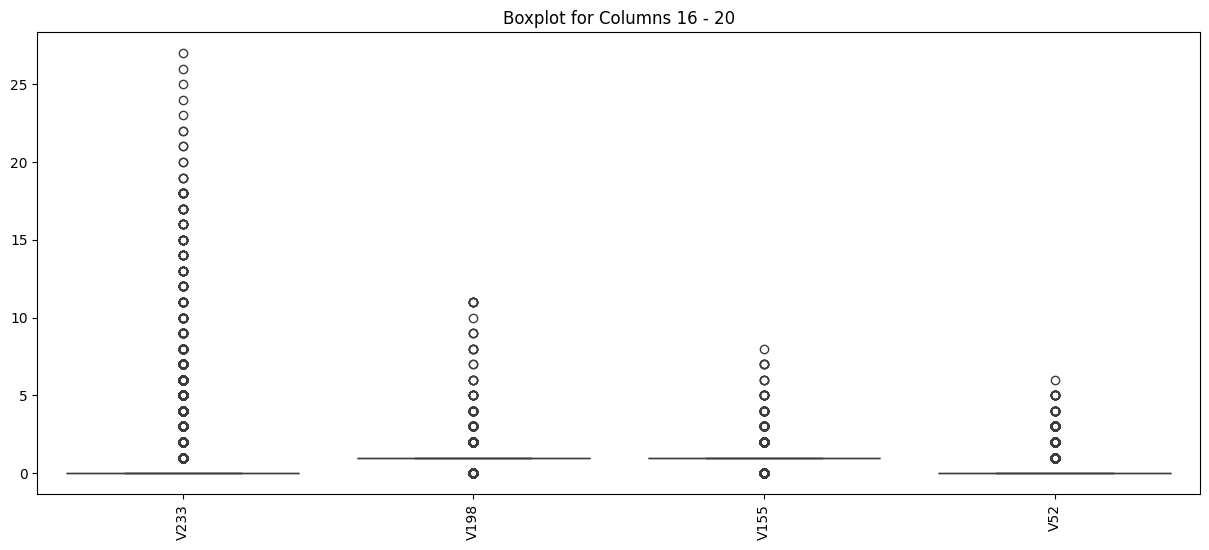

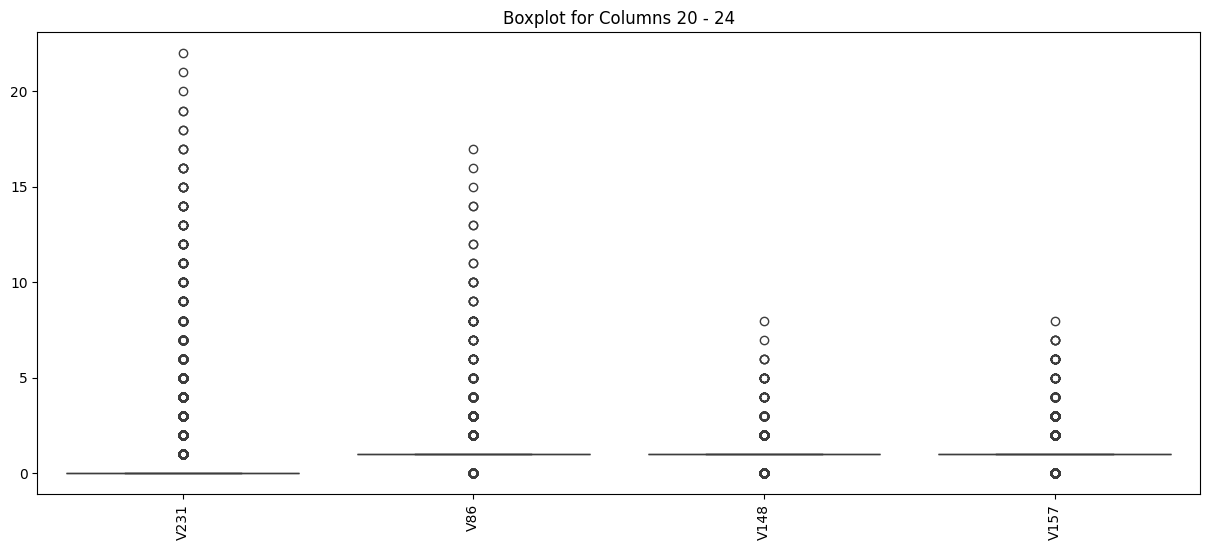

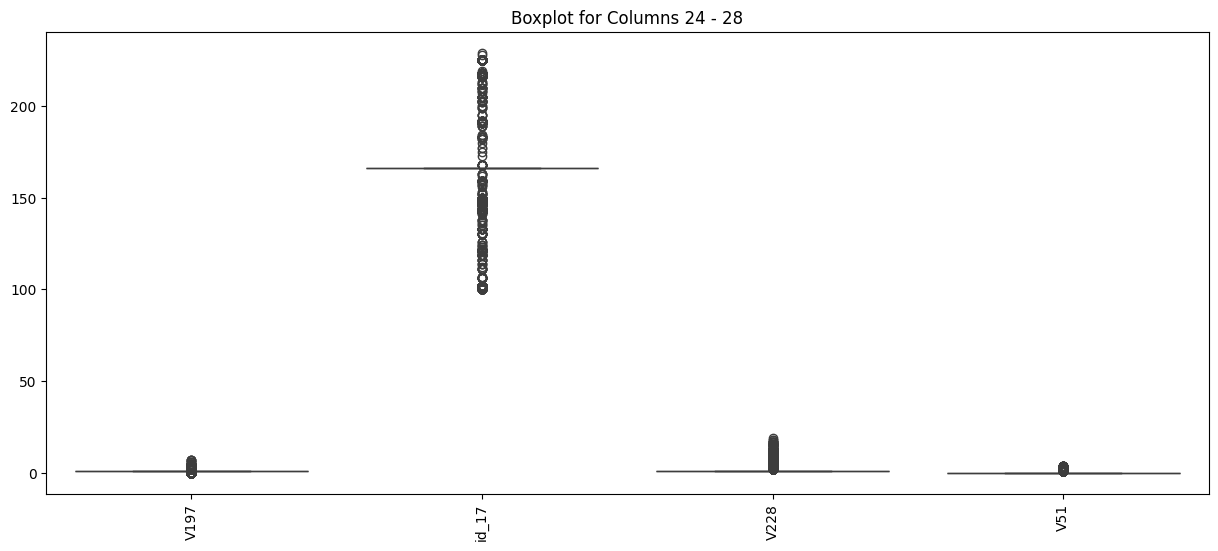

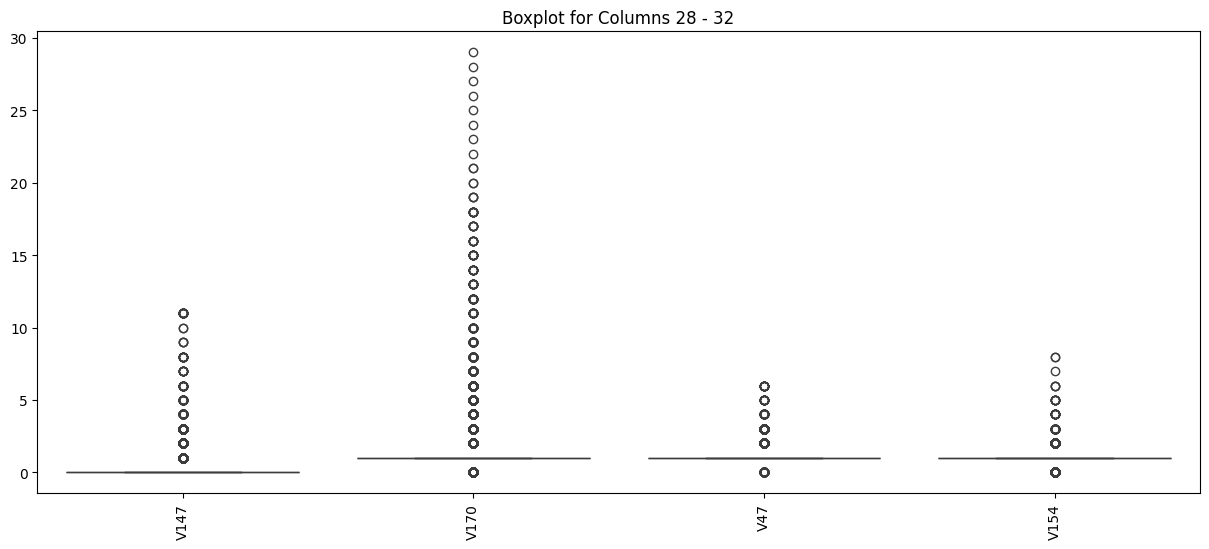

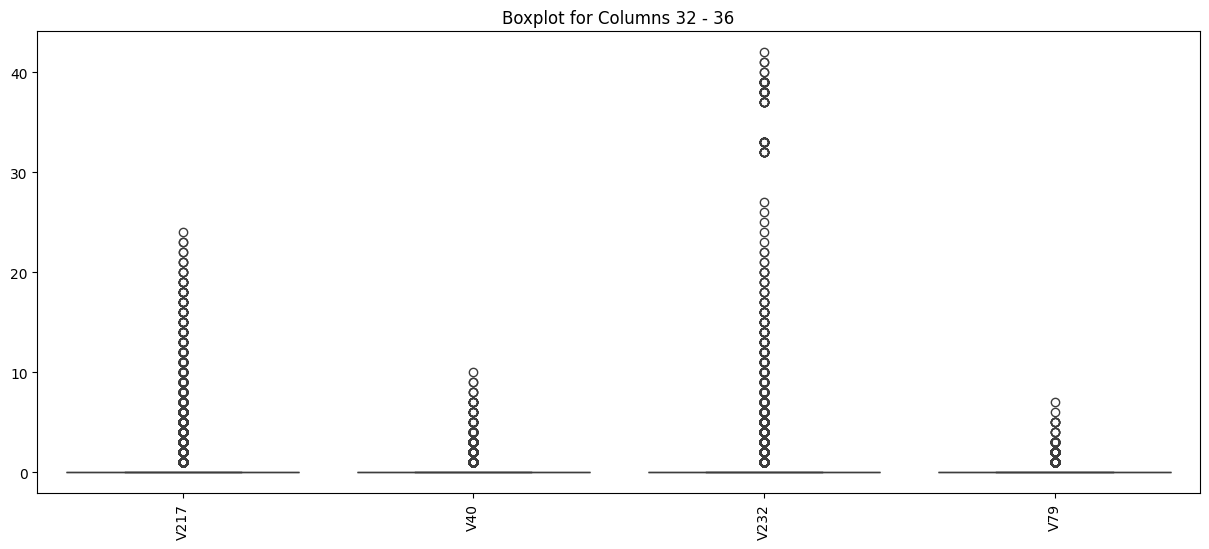

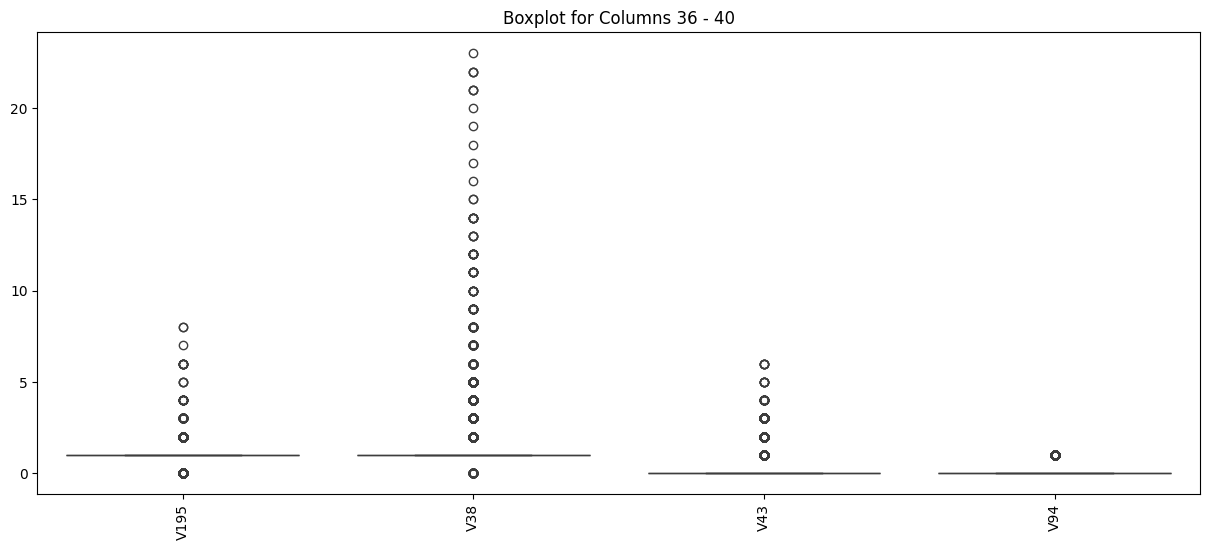

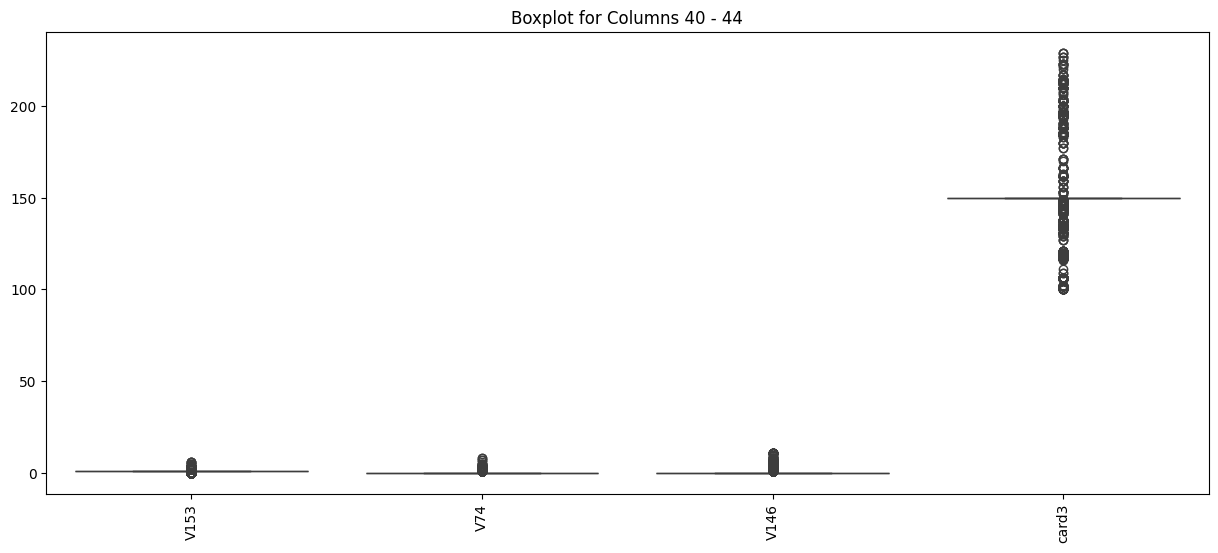

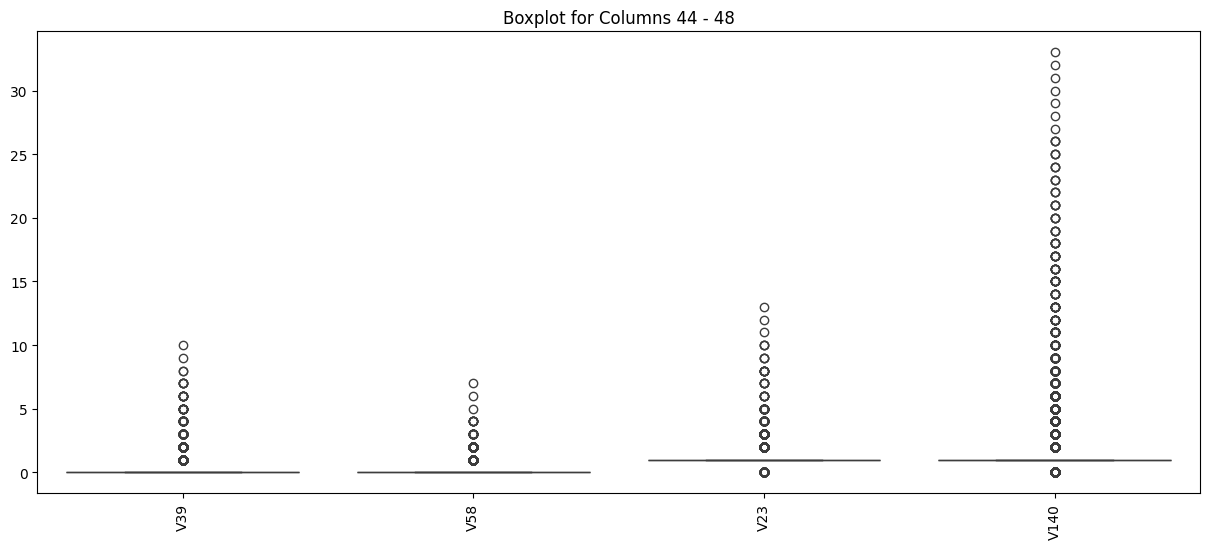

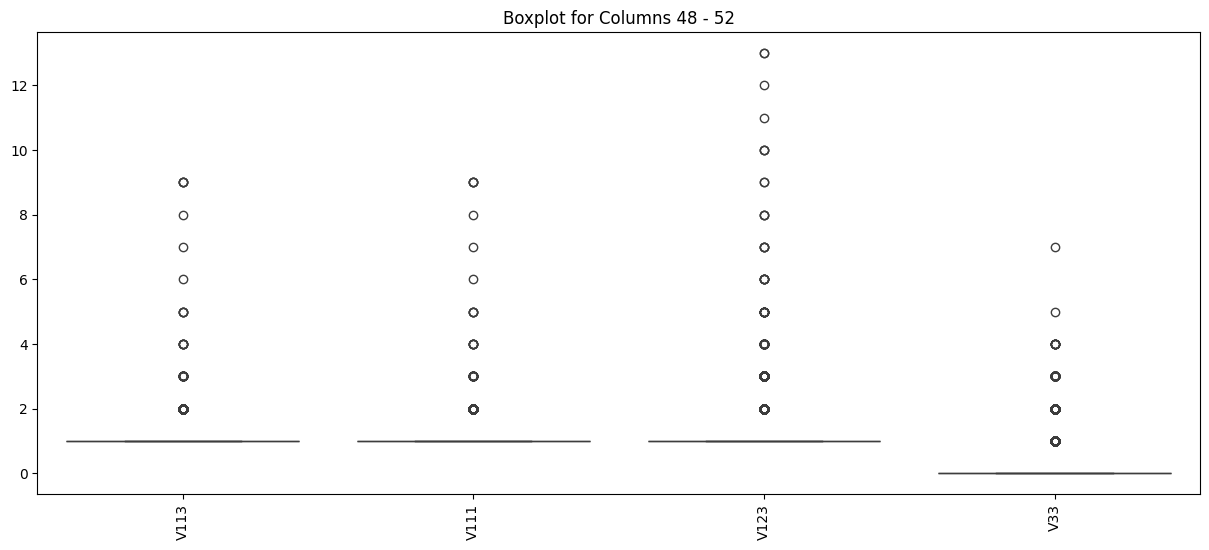

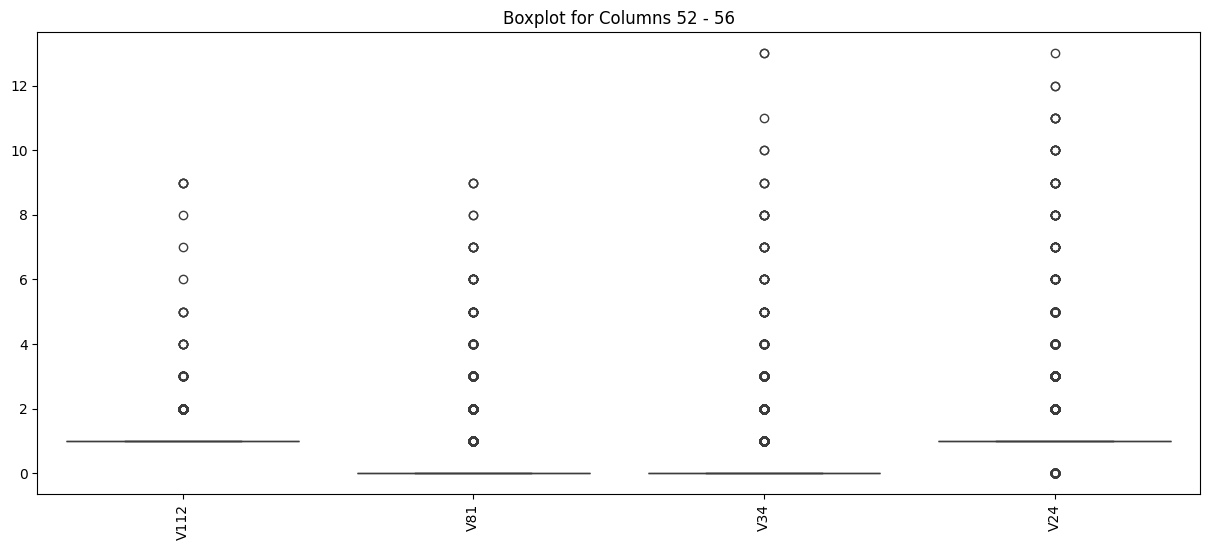

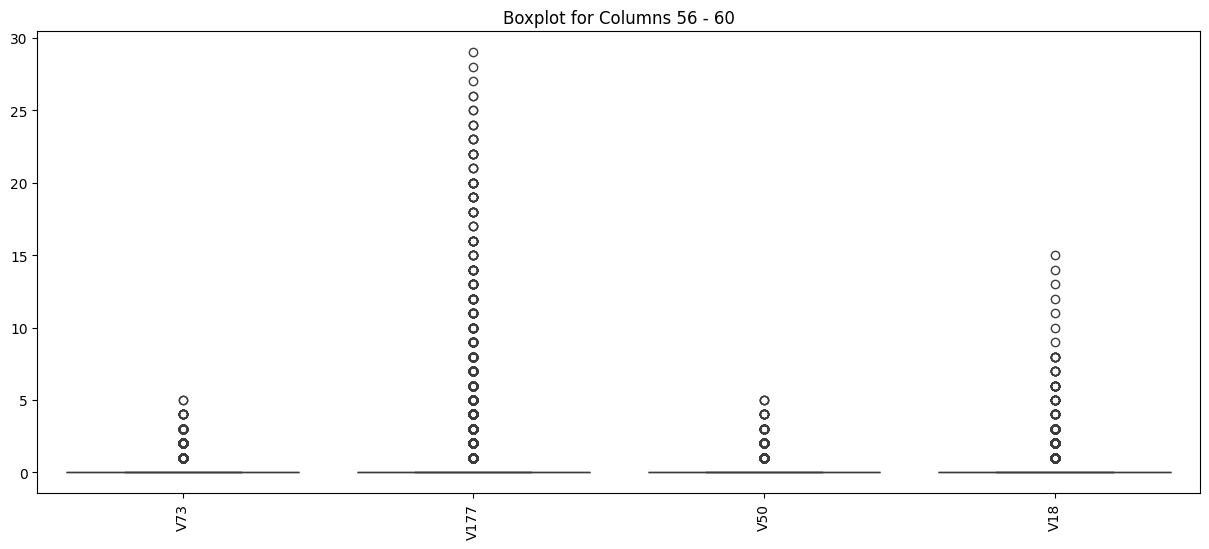

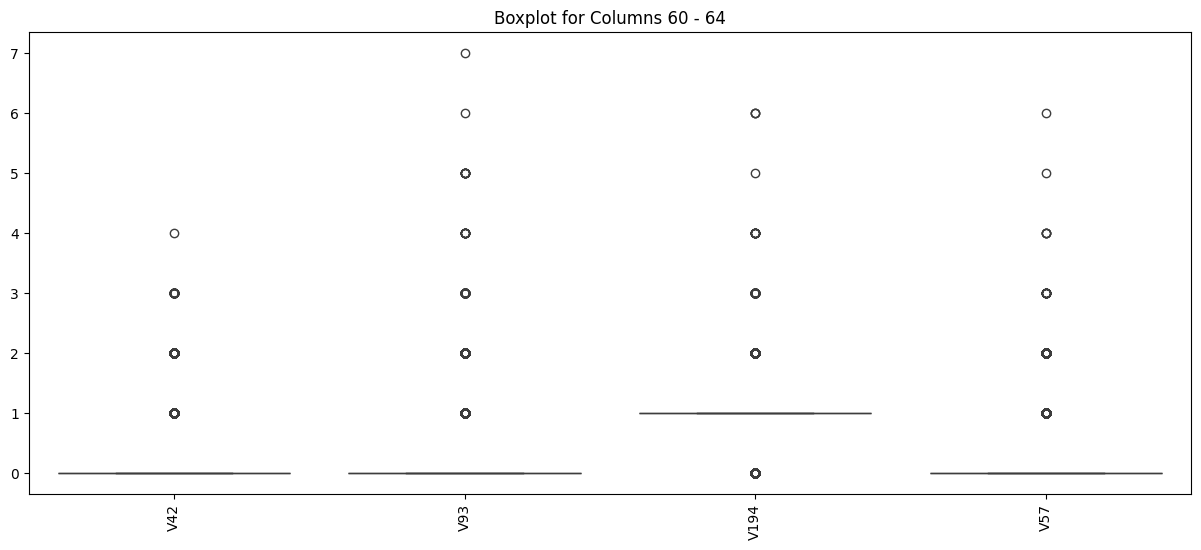

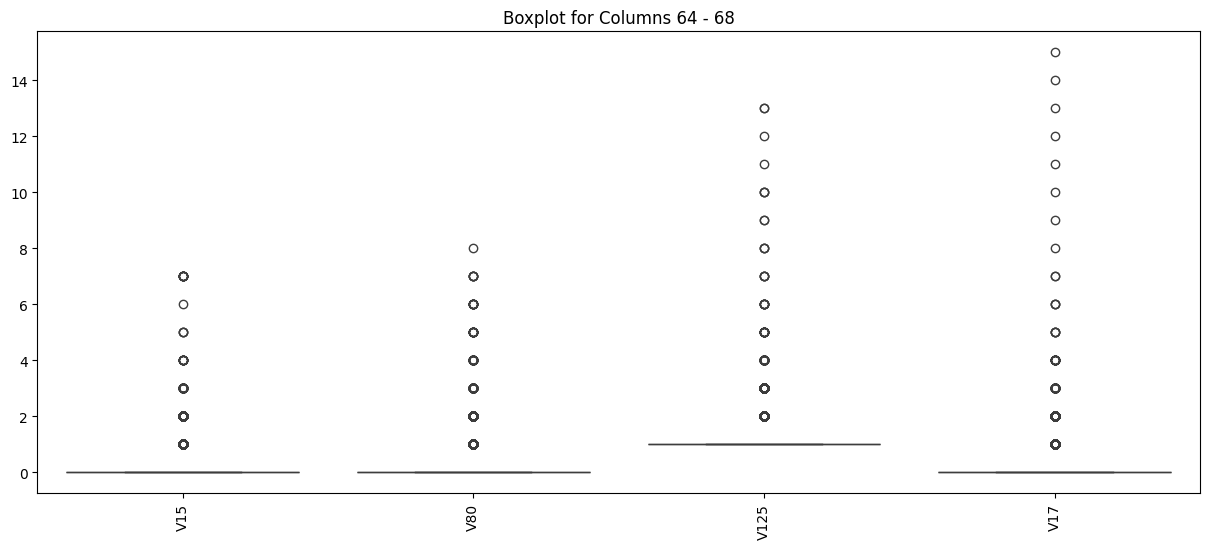

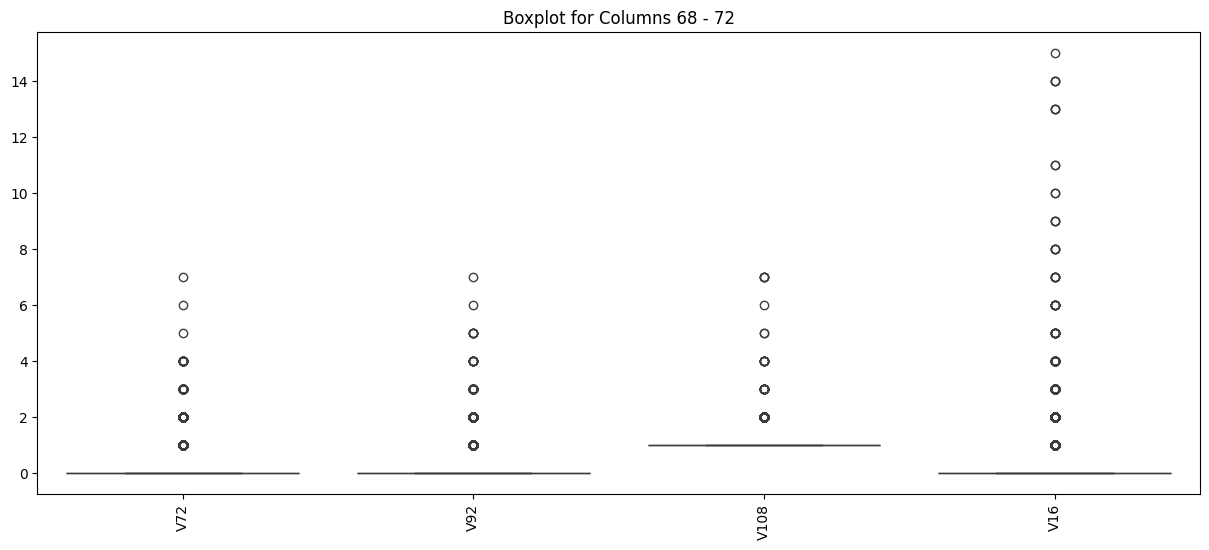

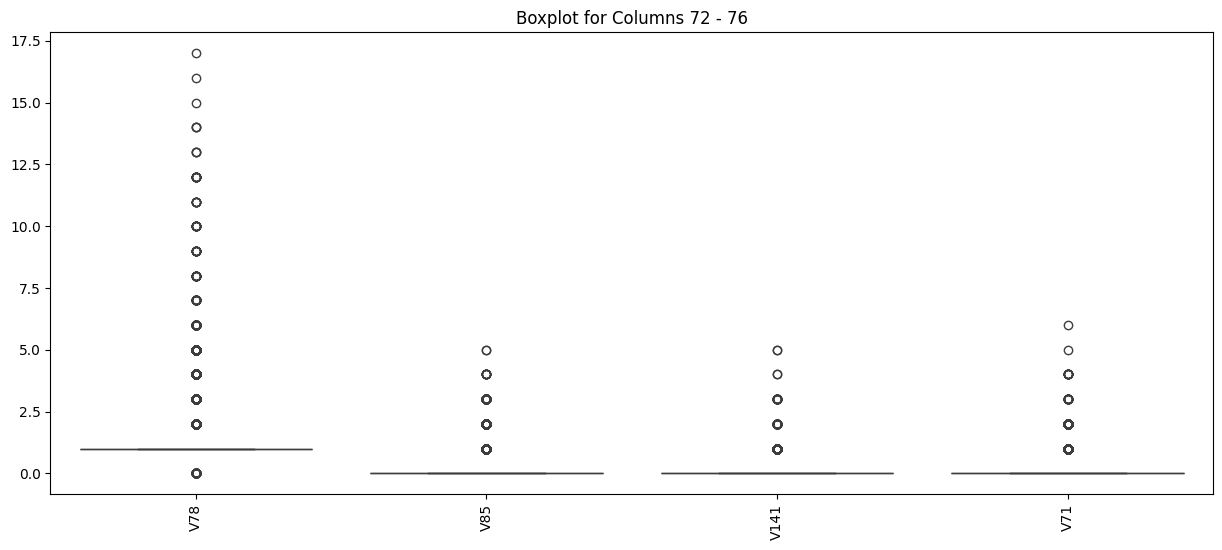

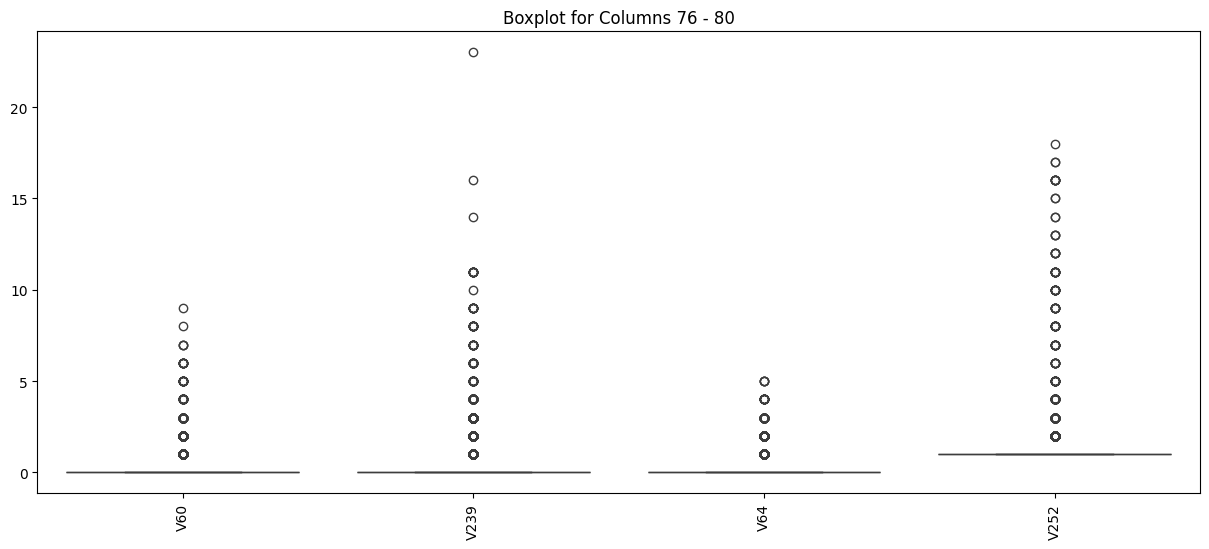

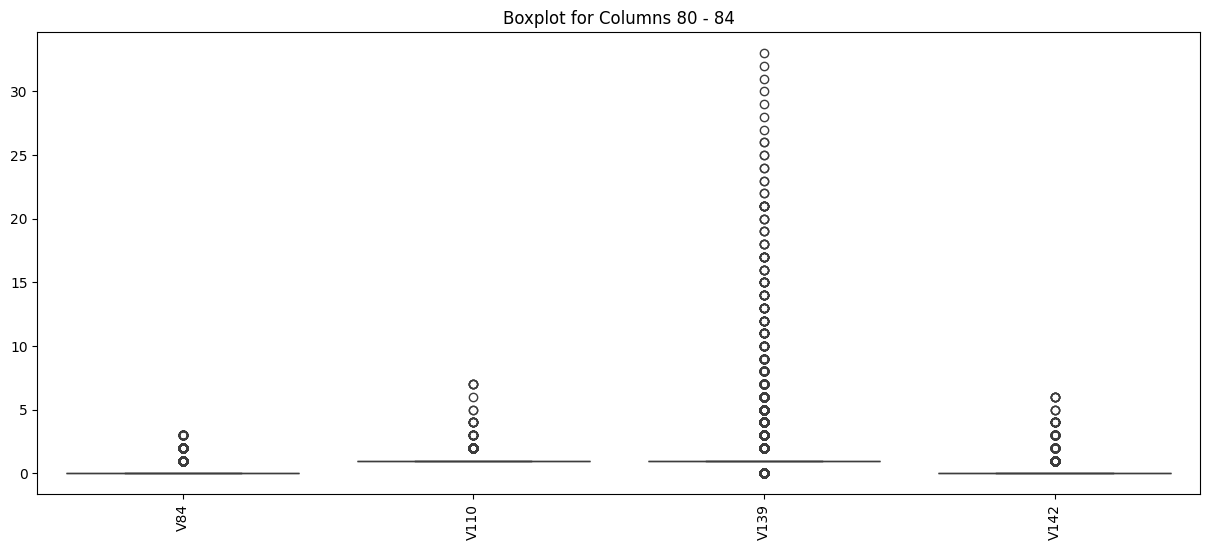

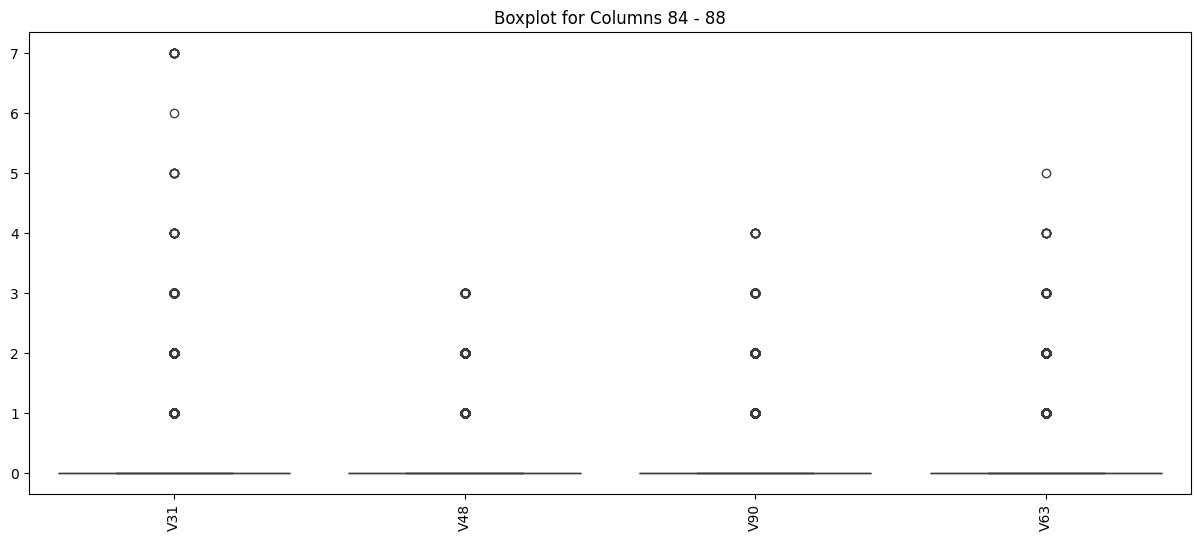

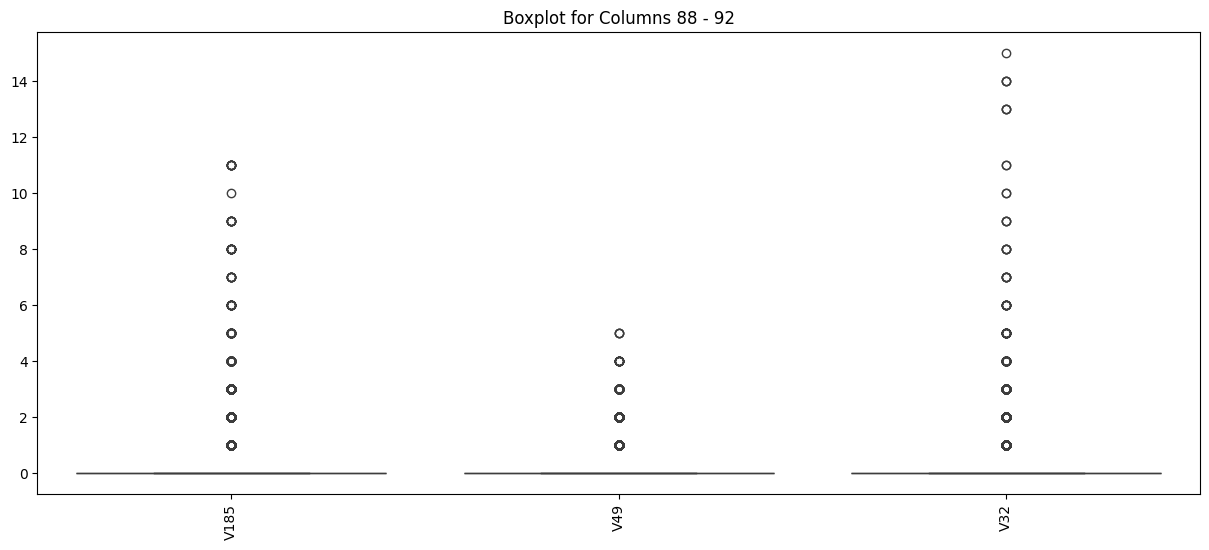

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = df1_selected.shape[1]
cols_per_plot = 4  # Adjust based on screen size

for i in range(0, num_cols, cols_per_plot):
    subset = df2_selected.iloc[:, i:i+cols_per_plot]  # Select 10 columns at a time

    plt.figure(figsize=(15, 6))
    sns.boxplot(data=subset)
    plt.xticks(rotation=90)  # Rotate column names
    plt.title(f'Boxplot for Columns {i} - {i+cols_per_plot}')
    plt.show()


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [162]:
scaler = StandardScaler()

scaled_df2 = pd.DataFrame(scaler.fit_transform(df2_selected),columns=df2_selected.columns)
# scaled_df2 = pd.Dataframe(scaled_df2, columns=df2_selected.columns)

In [163]:
scaler = StandardScaler()

scaled_df2 = pd.DataFrame(scaler.fit_transform(df2_selected),columns=df2_selected.columns)
correlating_scaled_data = scaled_df2.corr()
correlating_scaled_data

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
isFraud,1.000000,0.245688,0.226917,0.215607,0.202582,0.220369,0.192111,0.119130,0.175053,0.113950,...,0.108177,0.048661,0.042211,0.087935,-0.060704,-0.071383,0.089910,0.078579,-0.059857,0.085801
V201,0.245688,1.000000,0.873274,0.926164,0.486273,0.408389,0.805526,0.125771,0.411152,0.103647,...,0.188869,0.136729,0.071025,0.061262,-0.023672,-0.028208,0.090489,0.241017,-0.023261,0.059242
V189,0.226917,0.873274,1.000000,0.748071,0.313361,0.253791,0.873961,0.133856,0.301849,0.139738,...,0.169278,0.060199,0.026222,0.021696,0.001707,0.002034,0.054137,0.169548,0.001677,0.019926
V200,0.215607,0.926164,0.748071,1.000000,0.471720,0.411632,0.859505,0.127530,0.391667,0.105589,...,0.204809,0.147539,0.063645,0.044406,-0.018970,-0.022606,0.078948,0.211480,-0.018641,0.043036
V257,0.202582,0.486273,0.313361,0.471720,1.000000,0.356453,0.295527,0.062697,0.935470,0.049957,...,0.177705,0.131662,0.058944,0.111640,-0.051471,-0.061336,0.108145,0.158500,-0.050578,0.106580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V90,-0.071383,-0.028208,0.002034,-0.022606,-0.061336,-0.018933,0.011757,0.163469,-0.049980,0.167618,...,-0.014260,0.012905,-0.041286,-0.184579,0.786431,1.000000,-0.185457,-0.079670,0.771034,-0.168934
V63,0.089910,0.090489,0.054137,0.078948,0.108145,0.119032,0.039730,0.040103,0.099518,0.041876,...,0.050780,0.003868,0.015149,0.662523,-0.155632,-0.185457,1.000000,0.060469,-0.152930,0.605127
V185,0.078579,0.241017,0.169548,0.211480,0.158500,0.043925,0.128228,0.059413,0.112408,0.035289,...,0.034169,0.325963,0.115123,0.074748,-0.066857,-0.079670,0.060469,1.000000,-0.065697,0.067105
V49,-0.059857,-0.023261,0.001677,-0.018641,-0.050578,0.023489,0.009695,0.134799,-0.041214,0.138220,...,-0.009863,0.010642,-0.034045,-0.152206,0.977599,0.771034,-0.152930,-0.065697,1.000000,-0.139305


In [164]:
correlating_scaled_data = correlating_scaled_data['isFraud'].abs().sort_values(ascending=False)

In [165]:
for col,count in correlating_scaled_data.items():
    print(f"Column: {col}, Correlation Values: {count: .6f}")

Column: isFraud, Correlation Values:  1.000000
Column: V201, Correlation Values:  0.245688
Column: V189, Correlation Values:  0.226917
Column: V45, Correlation Values:  0.220369
Column: V200, Correlation Values:  0.215607
Column: V257, Correlation Values:  0.202582
Column: V188, Correlation Values:  0.192111
Column: V44, Correlation Values:  0.188546
Column: V87, Correlation Values:  0.186270
Column: V246, Correlation Values:  0.175053
Column: V171, Correlation Values:  0.170901
Column: V86, Correlation Values:  0.167540
Column: V52, Correlation Values:  0.164082
Column: V244, Correlation Values:  0.162933
Column: V233, Correlation Values:  0.151736
Column: V242, Correlation Values:  0.151326
Column: V198, Correlation Values:  0.150228
Column: V51, Correlation Values:  0.144203
Column: V231, Correlation Values:  0.142044
Column: card3, Correlation Values:  0.140730
Column: id_17, Correlation Values:  0.138873
Column: V113, Correlation Values:  0.137571
Column: V79, Correlation Values: 

In [166]:
for col, count in fraud_important_feature.items():  # col = column name, count = number of nulls
        print(f"Column: {col}, Correlation Values: {count:.6f}")

Column: isFraud, Correlation Values: 1.000000
Column: V201, Correlation Values: 0.340504
Column: V189, Correlation Values: 0.317358
Column: V200, Correlation Values: 0.298870
Column: V257, Correlation Values: 0.289347
Column: V45, Correlation Values: 0.275433
Column: V188, Correlation Values: 0.270014
Column: V156, Correlation Values: 0.250835
Column: V246, Correlation Values: 0.249517
Column: V149, Correlation Values: 0.238343
Column: V44, Correlation Values: 0.234892
Column: V158, Correlation Values: 0.232770
Column: V171, Correlation Values: 0.232347
Column: V244, Correlation Values: 0.232292
Column: V87, Correlation Values: 0.218523
Column: V242, Correlation Values: 0.215373
Column: V233, Correlation Values: 0.214697
Column: V198, Correlation Values: 0.214386
Column: V155, Correlation Values: 0.210177
Column: V52, Correlation Values: 0.204990
Column: V231, Correlation Values: 0.200450
Column: V86, Correlation Values: 0.196306
Column: V148, Correlation Values: 0.195142
Column: V157,

In [167]:
# Ensure both dictionaries have the same keys (columns)
for col in correlating_scaled_data.keys():
    corr_value1 = correlating_scaled_data[col] if col in correlating_scaled_data else None
    corr_value2 = fraud_important_feature[col] if col in fraud_important_feature else None

    print(f"Column: {col}, Correlation (Scaled): {corr_value1:.6f}, Correlation (Fraud): {corr_value2:.6f}")


Column: isFraud, Correlation (Scaled): 1.000000, Correlation (Fraud): 1.000000
Column: V201, Correlation (Scaled): 0.245688, Correlation (Fraud): 0.340504
Column: V189, Correlation (Scaled): 0.226917, Correlation (Fraud): 0.317358
Column: V45, Correlation (Scaled): 0.220369, Correlation (Fraud): 0.275433
Column: V200, Correlation (Scaled): 0.215607, Correlation (Fraud): 0.298870
Column: V257, Correlation (Scaled): 0.202582, Correlation (Fraud): 0.289347
Column: V188, Correlation (Scaled): 0.192111, Correlation (Fraud): 0.270014
Column: V44, Correlation (Scaled): 0.188546, Correlation (Fraud): 0.234892
Column: V87, Correlation (Scaled): 0.186270, Correlation (Fraud): 0.218523
Column: V246, Correlation (Scaled): 0.175053, Correlation (Fraud): 0.249517
Column: V171, Correlation (Scaled): 0.170901, Correlation (Fraud): 0.232347
Column: V86, Correlation (Scaled): 0.167540, Correlation (Fraud): 0.196306
Column: V52, Correlation (Scaled): 0.164082, Correlation (Fraud): 0.204990
Column: V244, 

In [168]:
mean_df1_test = df1_selected.fillna(df1_selected.mean())

In [169]:
scaler = StandardScaler()

scaled_mean = pd.DataFrame(scaler.fit_transform(mean_df1_test),columns=df2_selected.columns)
correlating_mean_data = scaled_mean.corr()
correlating_mean_data

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
isFraud,1.000000,0.243664,0.227100,0.213870,0.200019,0.218296,0.193221,0.112588,0.172485,0.106981,...,0.108177,0.047296,0.046946,0.087970,-0.081725,-0.086799,0.087959,0.072655,-0.080220,0.085609
V201,0.243664,1.000000,0.875293,0.926002,0.482415,0.405788,0.809040,0.131904,0.407278,0.107767,...,0.188515,0.136453,0.073320,0.035903,-0.024035,-0.018814,0.057883,0.234050,-0.023525,0.036077
V189,0.227100,0.875293,1.000000,0.749255,0.313269,0.250546,0.874151,0.118284,0.301195,0.124783,...,0.169332,0.058089,0.033304,0.019279,-0.019585,-0.013173,0.048663,0.173095,-0.019169,0.017634
V200,0.213870,0.926002,0.749255,1.000000,0.468286,0.409692,0.862208,0.131890,0.388016,0.107924,...,0.204487,0.147066,0.066279,0.024492,-0.021243,-0.015318,0.052292,0.206083,-0.020792,0.024857
V257,0.200019,0.482415,0.313269,0.468286,1.000000,0.356677,0.296743,0.098159,0.934747,0.085046,...,0.178110,0.137228,0.053832,0.065025,-0.024168,-0.023418,0.052940,0.141474,-0.023656,0.064130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V90,-0.086799,-0.018814,-0.013173,-0.015318,-0.023418,-0.056970,-0.009372,0.008689,-0.022741,0.008824,...,-0.028850,-0.004657,-0.004725,-0.307553,0.826204,1.000000,-0.308875,-0.001314,0.806577,-0.280433
V63,0.087959,0.057883,0.048663,0.052292,0.052940,0.086489,0.043958,-0.010612,0.052757,-0.010206,...,0.047246,-0.000109,0.026468,0.699746,-0.315601,-0.308875,1.000000,-0.006362,-0.308909,0.636154
V185,0.072655,0.234050,0.173095,0.206083,0.141474,0.043360,0.135052,0.140814,0.099072,0.116227,...,0.032636,0.336480,0.100534,0.018092,-0.002038,-0.001314,-0.006362,1.000000,-0.001995,0.015443
V49,-0.080220,-0.023525,-0.019169,-0.020792,-0.023656,-0.041018,-0.016509,0.003253,-0.022754,0.003231,...,-0.025794,-0.007256,-0.000086,-0.304489,0.972623,0.806577,-0.308909,-0.001995,1.000000,-0.278360


In [170]:
correlating_fraud_data = correlating_mean_data['isFraud'].abs().sort_values(ascending=False)

In [171]:
# Ensure both dictionaries have the same keys (columns)
for col in correlating_scaled_data.keys():
    corr_value1 = correlating_fraud_data[col] if col in correlating_fraud_data else None
    corr_value2 = correlating_scaled_data[col] if col in correlating_scaled_data else None
    corr_value3= fraud_important_feature[col] if col in fraud_important_feature else None

    print(f"Column: {col},correlation (mean):{corr_value1:.6f} Correlation (Scaled): {corr_value2:.6f}, Correlation (Fraud): {corr_value3:.6f}")


Column: isFraud,correlation (mean):1.000000 Correlation (Scaled): 1.000000, Correlation (Fraud): 1.000000
Column: V201,correlation (mean):0.243664 Correlation (Scaled): 0.245688, Correlation (Fraud): 0.340504
Column: V189,correlation (mean):0.227100 Correlation (Scaled): 0.226917, Correlation (Fraud): 0.317358
Column: V45,correlation (mean):0.218296 Correlation (Scaled): 0.220369, Correlation (Fraud): 0.275433
Column: V200,correlation (mean):0.213870 Correlation (Scaled): 0.215607, Correlation (Fraud): 0.298870
Column: V257,correlation (mean):0.200019 Correlation (Scaled): 0.202582, Correlation (Fraud): 0.289347
Column: V188,correlation (mean):0.193221 Correlation (Scaled): 0.192111, Correlation (Fraud): 0.270014
Column: V44,correlation (mean):0.186165 Correlation (Scaled): 0.188546, Correlation (Fraud): 0.234892
Column: V87,correlation (mean):0.185155 Correlation (Scaled): 0.186270, Correlation (Fraud): 0.218523
Column: V246,correlation (mean):0.172485 Correlation (Scaled): 0.175053, 

In [172]:
df1_selected.head()

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0
1,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [173]:
df2_selected.head()

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df1_obj.head()

,ProductCD,card4,card6,P_emaildomain,id_12,id_15,id_16,M1,M2,M3,...,id_29,id_35,id_36,id_37,id_38,R_emaildomain,M4,id_31,DeviceType,DeviceInfo
0,W,discover,credit,gmail.com,NotFound,NaN,unknown,T,T,T,...,unknown,unknown,unknown,unknown,unknown,unknown,M2,unknown,unknown,unknown
1,W,mastercard,credit,gmail.com,NotFound,NaN,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown,unknown,unknown
2,W,visa,debit,outlook.com,NotFound,NaN,unknown,T,T,T,...,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown,unknown,unknown
3,W,mastercard,debit,yahoo.com,NotFound,NaN,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown,unknown,unknown
4,H,mastercard,credit,gmail.com,NotFound,New,NotFound,unknown,unknown,unknown,...,NotFound,T,F,T,T,unknown,unknown,samsung browser 6.2,mobile,SAMSUNG SM-G892A Build/NRD90M


In [175]:
df1_obj_notunique= df1_obj.nunique()
df1_obj_notunique

,0
ProductCD,5
card4,4
card6,4
P_emaildomain,59
id_12,2
id_15,3
id_16,3
M1,2
M2,3
M3,3


In [176]:
low_unique_values = df1_obj_notunique[df1_obj_notunique <5 ].index
low_unique_values

Index(['card4', 'card6', 'id_12', 'id_15', 'id_16', 'M1', 'M2', 'M3', 'M5',
       'M6', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'M4',
       'DeviceType'],
      dtype='object')

In [177]:
df1_obj_low_unique = df1_obj[low_unique_values]

In [178]:
combine_preprocessing= pd.concat([df2_selected, df1_obj_low_unique], axis=1)

In [179]:
df1_obj_low_unique

,card4,card6,id_12,id_15,id_16,M1,M2,M3,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,discover,credit,NotFound,NaN,unknown,T,T,T,F,T,unknown,unknown,unknown,unknown,unknown,unknown,M2,unknown
1,mastercard,credit,NotFound,NaN,unknown,unknown,unknown,unknown,T,T,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
2,visa,debit,NotFound,NaN,unknown,T,T,T,F,F,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
3,mastercard,debit,NotFound,NaN,unknown,unknown,unknown,unknown,T,F,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
4,mastercard,credit,NotFound,New,NotFound,unknown,unknown,unknown,unknown,unknown,New,NotFound,T,F,T,T,unknown,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,visa,credit,NotFound,Unknown,unknown,unknown,unknown,unknown,unknown,unknown,New,NotFound,F,F,F,T,M2,mobile
99996,visa,debit,NotFound,NaN,unknown,unknown,unknown,unknown,F,F,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
99997,visa,credit,Found,Found,Found,unknown,unknown,unknown,unknown,unknown,Found,Found,T,F,T,T,unknown,desktop
99998,mastercard,credit,NotFound,New,NotFound,unknown,unknown,unknown,unknown,unknown,New,NotFound,T,F,F,T,unknown,desktop


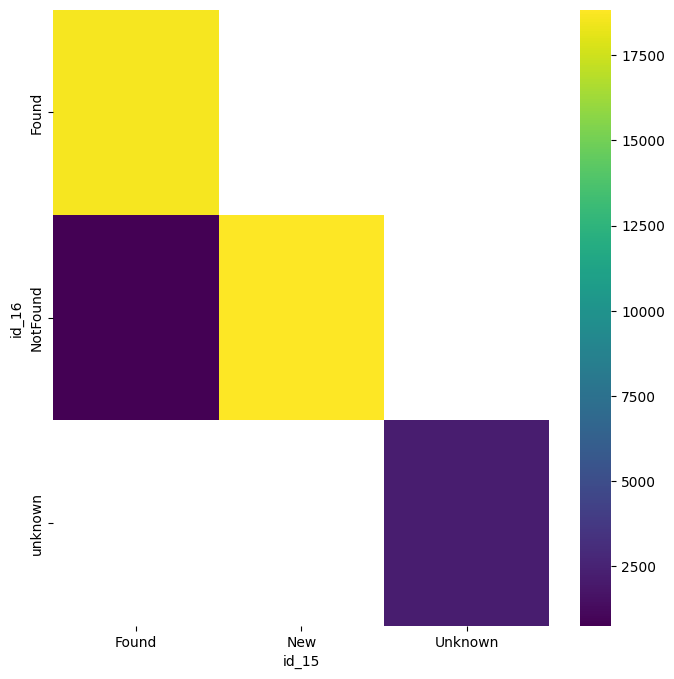

In [180]:
# @title id_15 vs id_16

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['id_16'].value_counts()
    for x_label, grp in df1_obj_low_unique.groupby('id_15')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id_15')
_ = plt.ylabel('id_16')

In [181]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_result = encoder.fit_transform(df1_obj_low_unique)
encoded_df = pd.DataFrame(
    encoded_result,
    columns=encoder.get_feature_names_out(df1_obj_low_unique.columns)
)

In [182]:
encoded_df

,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,card6_nan,id_12_NotFound,id_15_New,id_15_Unknown,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
99996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [183]:
fraud_value= df1['isFraud']


In [184]:
encoded_corr =pd.concat([encoded_df, fraud_value],axis = 1 )

In [185]:
encoded_obj_corr = encoded_corr['isFraud'].abs().sort_values(ascending=False)

In [186]:
encoded_new_corr =encoded_corr.corr()

In [187]:
encoded_new_corr

,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,card6_nan,id_12_NotFound,id_15_New,id_15_Unknown,...,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown,isFraud
card4_discover,1.000000,-0.078981,-0.168241,0.154241,-0.154191,-0.001019,-0.000770,-0.030461,0.034426,-0.004904,...,0.047311,-0.053541,0.020720,-0.053541,-0.017346,-0.037831,0.058659,0.010297,-0.053689,-0.000233
card4_mastercard,-0.078981,1.000000,-0.895588,0.004302,-0.004433,0.012904,-0.004101,0.037355,-0.040346,0.022497,...,-0.031625,0.047558,-0.005215,0.047558,0.021558,0.077411,-0.091768,-0.002730,0.047003,0.013170
card4_visa,-0.168241,-0.895588,1.000000,-0.137187,0.137315,-0.011556,0.001250,0.031911,-0.009426,-0.019456,...,-0.046335,0.048767,-0.022752,0.048767,0.002465,-0.042239,0.013306,-0.009047,0.048686,-0.006296
card6_credit,0.154241,0.004302,-0.137187,1.000000,-0.999693,-0.006148,-0.004647,-0.150639,0.210119,0.051958,...,0.333504,-0.406422,0.263951,-0.406422,-0.088659,0.013248,0.207294,0.096857,-0.404921,0.048295
card6_debit,-0.154191,-0.004433,0.137315,-0.999693,1.000000,-0.011383,-0.008605,0.150555,-0.210066,-0.051909,...,-0.333500,0.406357,-0.263918,0.406357,0.088729,-0.013368,-0.207272,-0.096799,0.404857,-0.048508
card6_debit or credit,-0.001019,0.012904,-0.011556,-0.006148,-0.011383,1.000000,-0.000053,0.002012,-0.004031,-0.001266,...,-0.005679,0.006889,-0.005473,0.006889,-0.002244,-0.002697,0.004749,-0.003175,0.006872,-0.001356
card6_nan,-0.000770,-0.004101,0.001250,-0.004647,-0.008605,-0.000053,1.000000,0.001521,0.000997,-0.000957,...,0.002512,-0.001237,-0.000685,-0.001237,-0.001696,-0.002038,-0.000982,0.002367,-0.001253,0.018993
id_12_NotFound,-0.030461,0.037355,0.031911,-0.150639,0.150555,0.002012,0.001521,1.000000,0.046980,0.003347,...,-0.242880,0.280729,-0.180118,0.280729,0.064477,0.077491,-0.205991,-0.094330,0.280634,-0.004189
id_15_New,0.034426,-0.040346,-0.009426,0.210119,-0.210066,-0.004031,0.000997,0.046980,1.000000,-0.072879,...,0.405282,-0.585165,0.445831,-0.585165,-0.126236,0.106621,0.214524,0.401385,-0.586550,-0.015941
id_15_Unknown,-0.004904,0.022497,-0.019456,0.051958,-0.051909,-0.001266,-0.000957,0.003347,-0.072879,1.000000,...,-0.102676,-0.183725,0.166905,-0.183725,-0.038133,0.253953,-0.072821,0.206405,-0.168459,0.038830


In [188]:
# Drop columns with very low variance
low_variance_cols = [col for col in encoded_new_corr.columns if encoded_new_corr[col].nunique() <= 2]
df_filtered = encoded_new_corr.drop(columns=low_variance_cols)
low_variance_cols = df_filtered.var()[df_filtered.var() < 0.001].index  # Threshold can be adjusted
df_filtered = df_filtered.drop(columns=low_variance_cols)
df_filtered


,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,card6_nan,id_12_NotFound,id_15_New,id_15_Unknown,...,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown,isFraud
card4_discover,1.000000,-0.078981,-0.168241,0.154241,-0.154191,-0.001019,-0.000770,-0.030461,0.034426,-0.004904,...,0.047311,-0.053541,0.020720,-0.053541,-0.017346,-0.037831,0.058659,0.010297,-0.053689,-0.000233
card4_mastercard,-0.078981,1.000000,-0.895588,0.004302,-0.004433,0.012904,-0.004101,0.037355,-0.040346,0.022497,...,-0.031625,0.047558,-0.005215,0.047558,0.021558,0.077411,-0.091768,-0.002730,0.047003,0.013170
card4_visa,-0.168241,-0.895588,1.000000,-0.137187,0.137315,-0.011556,0.001250,0.031911,-0.009426,-0.019456,...,-0.046335,0.048767,-0.022752,0.048767,0.002465,-0.042239,0.013306,-0.009047,0.048686,-0.006296
card6_credit,0.154241,0.004302,-0.137187,1.000000,-0.999693,-0.006148,-0.004647,-0.150639,0.210119,0.051958,...,0.333504,-0.406422,0.263951,-0.406422,-0.088659,0.013248,0.207294,0.096857,-0.404921,0.048295
card6_debit,-0.154191,-0.004433,0.137315,-0.999693,1.000000,-0.011383,-0.008605,0.150555,-0.210066,-0.051909,...,-0.333500,0.406357,-0.263918,0.406357,0.088729,-0.013368,-0.207272,-0.096799,0.404857,-0.048508
card6_debit or credit,-0.001019,0.012904,-0.011556,-0.006148,-0.011383,1.000000,-0.000053,0.002012,-0.004031,-0.001266,...,-0.005679,0.006889,-0.005473,0.006889,-0.002244,-0.002697,0.004749,-0.003175,0.006872,-0.001356
card6_nan,-0.000770,-0.004101,0.001250,-0.004647,-0.008605,-0.000053,1.000000,0.001521,0.000997,-0.000957,...,0.002512,-0.001237,-0.000685,-0.001237,-0.001696,-0.002038,-0.000982,0.002367,-0.001253,0.018993
id_12_NotFound,-0.030461,0.037355,0.031911,-0.150639,0.150555,0.002012,0.001521,1.000000,0.046980,0.003347,...,-0.242880,0.280729,-0.180118,0.280729,0.064477,0.077491,-0.205991,-0.094330,0.280634,-0.004189
id_15_New,0.034426,-0.040346,-0.009426,0.210119,-0.210066,-0.004031,0.000997,0.046980,1.000000,-0.072879,...,0.405282,-0.585165,0.445831,-0.585165,-0.126236,0.106621,0.214524,0.401385,-0.586550,-0.015941
id_15_Unknown,-0.004904,0.022497,-0.019456,0.051958,-0.051909,-0.001266,-0.000957,0.003347,-0.072879,1.000000,...,-0.102676,-0.183725,0.166905,-0.183725,-0.038133,0.253953,-0.072821,0.206405,-0.168459,0.038830


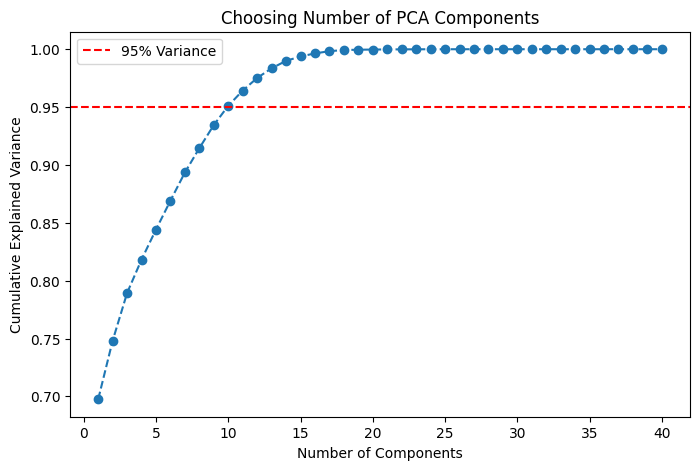

In [189]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Standardize data before PCA (if not done already)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)  # Use your cleaned dataset

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Number of PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()
plt.show()


In [190]:
pca= PCA(n_components=10)
pca.fit(df_scaled)
data_pca = pca.transform(df_scaled)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.082911,0.747981,-2.729296,1.160925,-1.757577,-2.874253,0.970619,2.945155,0.953921,-0.349096
1,-0.154430,5.856976,-0.891566,-0.796082,0.526774,0.928691,-0.866993,-0.963623,-0.203658,-0.017557
2,-0.287103,-6.059948,1.481976,0.512037,0.002624,-0.330434,0.200611,-0.176791,0.025068,0.390631
3,4.194124,0.665757,-1.840665,0.902047,-0.686187,-1.026840,0.526901,0.076809,0.054852,0.351430
4,-3.729562,-0.793630,1.502447,-0.830875,0.698158,0.827762,-0.977142,-0.484525,0.000522,-0.087290
5,0.181862,0.150839,-0.698417,0.198129,4.597949,0.831719,3.937818,1.062293,-0.345106,-0.138685
6,0.257242,-0.138092,-0.271243,1.361348,-2.922138,4.986119,1.440929,1.293991,0.196665,-0.031943
7,-2.211706,0.225324,1.412898,-1.542947,-0.236606,-0.213169,-0.206456,0.686408,-0.402154,-0.958708
8,5.457180,-0.385866,0.022614,-1.736419,-0.359899,-0.065541,-0.083227,0.351169,-1.288403,-0.907489
9,1.831945,0.937427,2.454765,-0.323142,-0.181330,-0.532745,0.612995,0.372513,3.177424,1.693410


<Axes: >

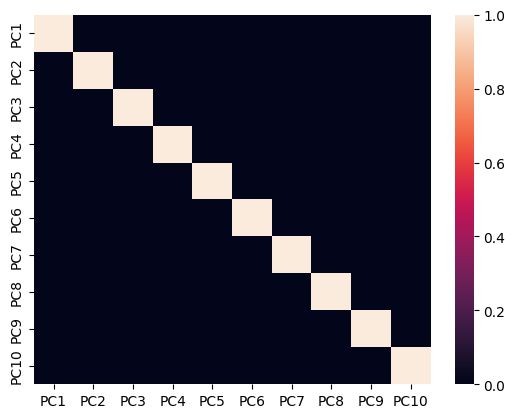

In [191]:
sns.heatmap(data_pca.corr())

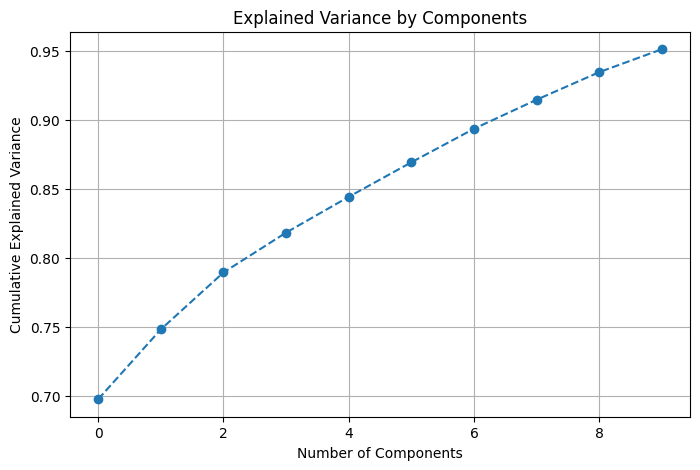

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already fitted PCA
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()



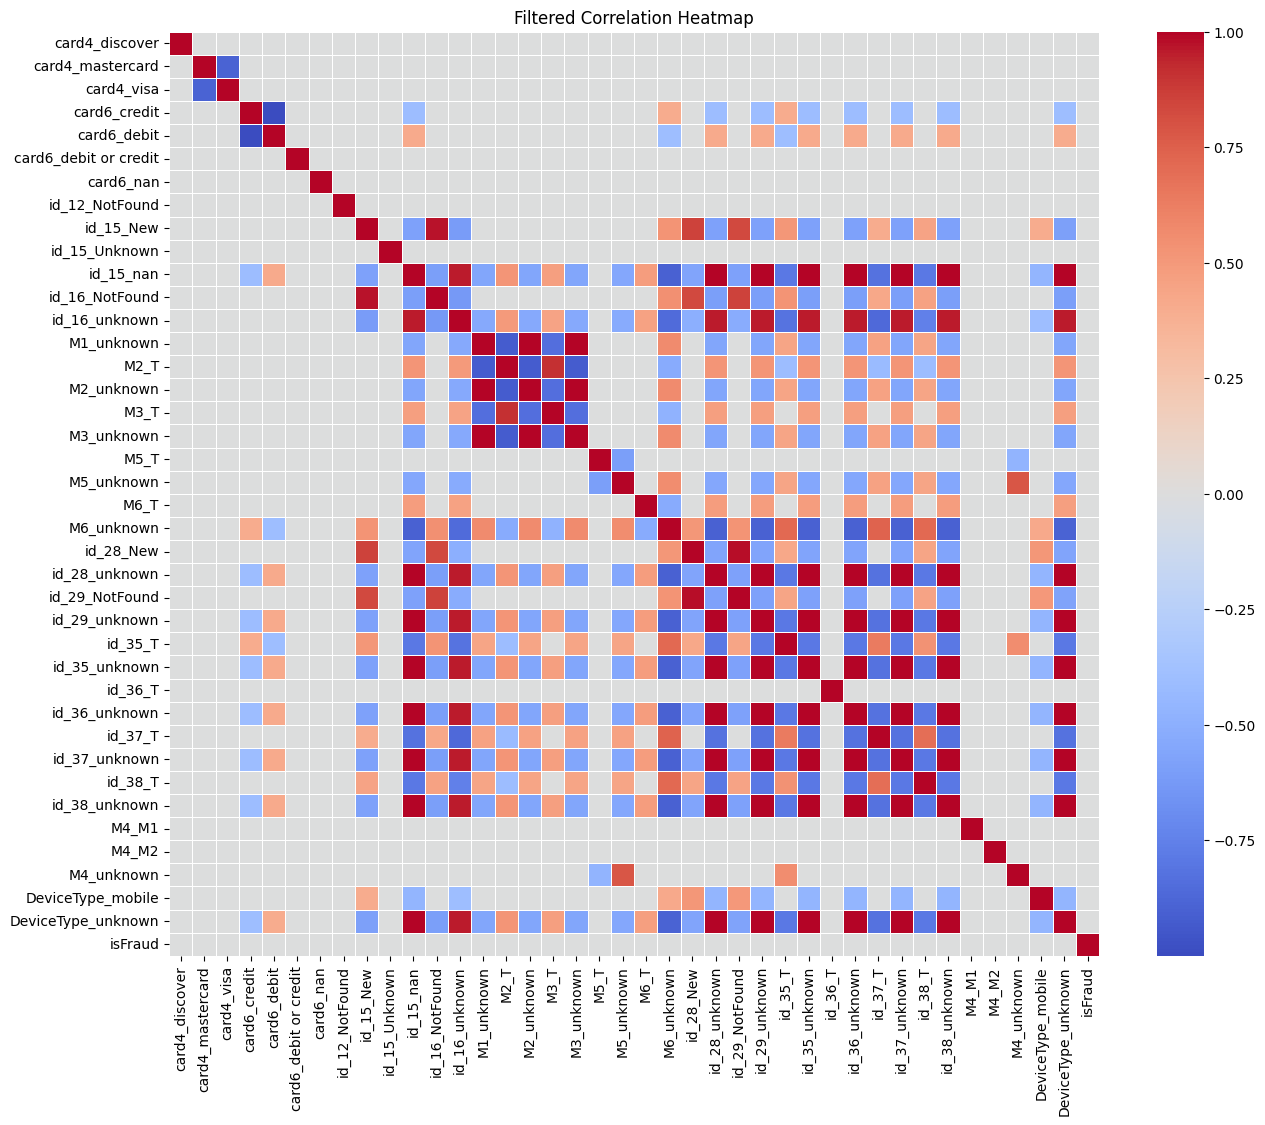

In [193]:
threshold = 0.4  # Adjust as needed
filtered_corr = encoded_new_corr.copy()
filtered_corr[np.abs(filtered_corr) < threshold] = 0  # Set weak correlations to 0

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(filtered_corr,annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Heatmap")
plt.show()

In [194]:
encoded_obj_corr = encoded_new_corr['isFraud'].abs().sort_values(ascending=False)

In [195]:
encoded_obj_corr

,isFraud
isFraud,1.000000
M4_M2,0.125106
M4_unknown,0.104668
id_38_T,0.067107
DeviceType_mobile,0.062537
card6_debit,0.048508
DeviceType_unknown,0.048317
card6_credit,0.048295
id_28_unknown,0.047904
id_38_unknown,0.047904


In [196]:
# threshold = 0.4  # Adjust as needed
# filtered_corr =scaled_object.copy()
# filtered_corr[np.abs(filtered_corr) < threshold] = 0  # Set weak correlations to 0

# # Plot heatmap
# plt.figure(figsize=(15,12))
# sns.heatmap(filtered_corr,annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Filtered Correlation Heatmap")
# plt.show()

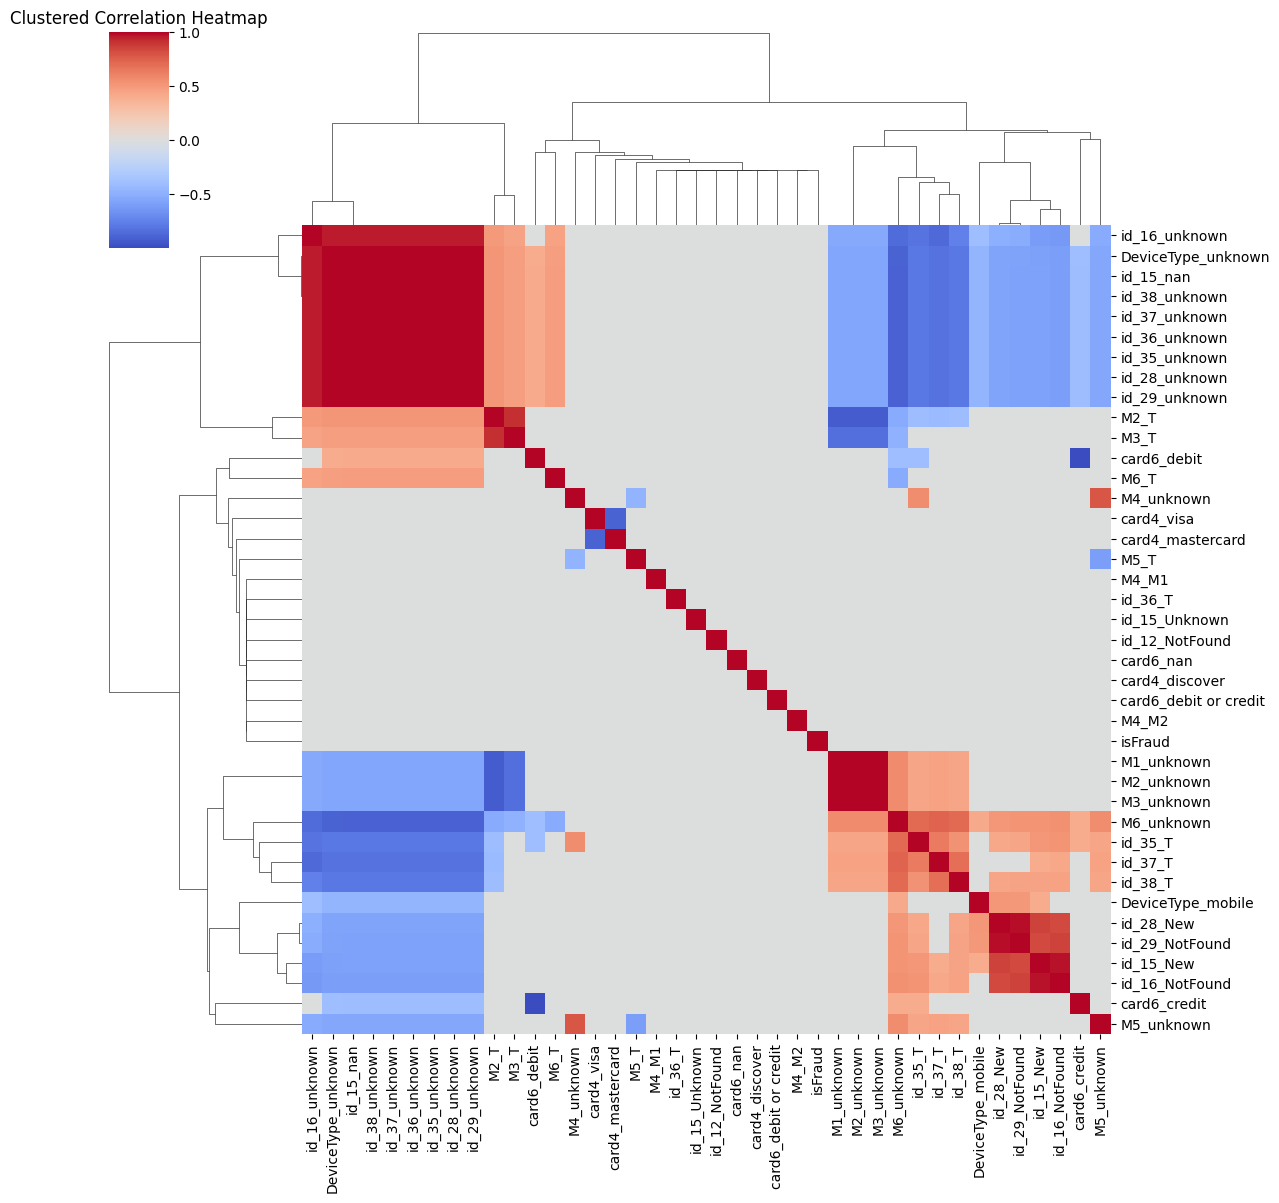

In [197]:
sns.clustermap(filtered_corr, cmap="coolwarm", figsize=(12, 12))
plt.title("Clustered Correlation Heatmap")
plt.show()


In [198]:
df2_selected

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
encoded_df

,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,card6_nan,id_12_NotFound,id_15_New,id_15_Unknown,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
99996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [200]:
model_df= pd.concat([df2_selected, encoded_df], axis=1)

In [201]:
model_df

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [203]:
X = model_df.drop('isFraud', axis=1)
y = model_df['isFraud']

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [205]:
X_train.shape

(80000, 129)

In [206]:
import tensorflow as tf

In [207]:
model = tf.keras.Sequential([
    #  Input(shape=(129,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9697 - loss: 0.1421 - val_accuracy: 0.9778 - val_loss: 0.1027
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9765 - loss: 0.1011 - val_accuracy: 0.9775 - val_loss: 0.0938
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9776 - loss: 0.0970 - val_accuracy: 0.9780 - val_loss: 0.0996
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9787 - loss: 0.0892 - val_accuracy: 0.9786 - val_loss: 0.0921
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9779 - loss: 0.0930 - val_accuracy: 0.9779 - val_loss: 0.0920
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9785 - loss: 0.0902 - val_accuracy: 0.9791 - val_loss: 0.0880
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9774 - loss: 0.0920 - val_accuracy: 0.9786 - val_loss: 0.0900
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9778 - loss: 0

In [208]:
from sklearn.metrics import average_precision_score

y_probs = model.predict(X_test)
auc_pr = average_precision_score(y_test, y_probs)
print("AUC-PR:", auc_pr)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC-PR: 0.32600010142579783


In [209]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,868 (81.52 KB)

In [210]:
model.evaluate(X_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9791 - loss: 0.0937


[0.0949549451470375, 0.978600025177002]

In [211]:
from sklearn.metrics import confusion_matrix, classification_report


In [212]:
ypred= model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [214]:
tf.round(ypred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [215]:
accuracy = accuracy_score(y_test, tf.round(ypred))

In [216]:
accuracy

0.9786

In [217]:
confusion_matrix(y_test, tf.round(ypred))

array([[19486,    13],
       [  415,    86]])

In [218]:
precision_score(y_test, tf.round(ypred))

0.8686868686868687

In [219]:
recall_score(y_test, tf.round(ypred))

0.17165668662674652

In [220]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy,
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9711 - loss: 0.0455 - val_accuracy: 0.9772 - val_loss: 0.0328
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9767 - loss: 0.0320 - val_accuracy: 0.9758 - val_loss: 0.0412
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9770 - loss: 0.0303 - val_accuracy: 0.9780 - val_loss: 0.0272
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9776 - loss: 0.0279 - val_accuracy: 0.9759 - val_loss: 0.0285
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9769 - loss: 0.0289 - val_accuracy: 0.9779 - val_loss: 0.0267
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0280 - val_accuracy: 0.9788 - val_loss: 0.0264
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9777 - loss: 0.0267 - val_accuracy: 0.9782 - val_loss: 0.0267
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9778 - loss: 0.027

In [221]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,868 (81.52 KB)

In [222]:
model_2.evaluate(X_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0278


[0.028375625610351562, 0.9787499904632568]

In [223]:
y2_pred= model_2.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [224]:
print(classification_report(y_test, tf.round(y2_pred)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19499
           1       0.86      0.18      0.30       501

    accuracy                           0.98     20000
   macro avg       0.92      0.59      0.64     20000
weighted avg       0.98      0.98      0.97     20000



In [225]:
confusion_matrix(y_test, tf.round(y2_pred))

array([[19484,    15],
       [  410,    91]])

In [226]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert classes list to NumPy array
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = class_weight_dict = {0: 1.0, 1: 5.0}

print("Class Weights:", class_weight_dict)


Class Weights: {0: 1.0, 1: 5.0}


In [227]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_3= model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,class_weight=class_weight_dict  )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9715 - loss: 0.0797 - val_accuracy: 0.9749 - val_loss: 0.0398
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9734 - loss: 0.0762 - val_accuracy: 0.9792 - val_loss: 0.0363
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9739 - loss: 0.0761 - val_accuracy: 0.9275 - val_loss: 0.0645
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9755 - loss: 0.0724 - val_accuracy: 0.9786 - val_loss: 0.0278
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9735 - loss: 0.0760 - val_accuracy: 0.9741 - val_loss: 0.0473
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9739 - loss: 0.0747 - val_accuracy: 0.9776 - val_loss: 0.0344
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9745 - loss: 0.0763 - val_accuracy: 0.9751 - val_loss: 0.0378
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9756 - loss: 0.

In [228]:
# from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# print(class_weight_dict)  # Example output: {0: 0.5, 1: 15.0}


In [229]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,433 (40.75 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
model_3.evaluate(X_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9747 - loss: 0.9595


[0.9478293657302856, 0.9749500155448914]

In [231]:
y3_pred = model_3.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [232]:
accuracy = accuracy_score(y_test, tf.round(y3_pred))

In [233]:
accuracy

0.97495

In [234]:
classof_report =classification_report(y_test, tf.round(y3_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [235]:
print(classof_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19499
           1       0.00      0.00      0.00       501

    accuracy                           0.97     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.95      0.97      0.96     20000



In [236]:
X.shape, y.shape


((100000, 129), (100000,))

In [237]:
from imblearn.under_sampling import RandomUnderSampler

In [238]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X, y)

In [239]:
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X1_resampled, y1_resampled = rus.fit_resample(X, y)

In [240]:
X_first_train,X_first_test,y_first_train,y_first_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


In [241]:
X_sec_train,X_sec_test,y_sec_train,y_sec_test = train_test_split(X1_resampled,y1_resampled,test_size=0.2,random_state=42)


In [242]:
X.shape, y.shape

((100000, 129), (100000,))

In [243]:
X_resampled.shape, y_resampled.shape

((5122, 129), (5122,))

In [244]:
X1_resampled.shape, y1_resampled.shape

((7683, 129), (7683,))

In [245]:
model_first = tf.keras.Sequential([
    #  Input(shape=(129,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_first.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_first.fit(X_first_train, y_first_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5751 - loss: 0.9285 - val_accuracy: 0.5317 - val_loss: 0.7174
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 0.6108 - val_accuracy: 0.6829 - val_loss: 0.5763
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6964 - loss: 0.5801 - val_accuracy: 0.7037 - val_loss: 0.5420
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6953 - loss: 0.5818 - val_accuracy: 0.7024 - val_loss: 0.5458
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6950 - loss: 0.5940 - val_accuracy: 0.7329 - val_loss: 0.5203
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7133 - loss: 0.5545 - val_accuracy: 0.7305 - val_loss: 0.5246
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6934 - loss: 0.5817 - val_accuracy: 0.6878 - val_loss: 0.5715
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7277 - loss: 0.5309 - val_accuracy: 0.

In [246]:
model_sec = tf.keras.Sequential([
    #  Input(shape=(129,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_sec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_sec.fit(X_sec_train, y_sec_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6255 - loss: 1.9002 - val_accuracy: 0.7569 - val_loss: 0.4975
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7148 - loss: 0.5784 - val_accuracy: 0.7667 - val_loss: 0.4767
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7546 - loss: 0.5148 - val_accuracy: 0.7764 - val_loss: 0.4780
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7517 - loss: 0.5206 - val_accuracy: 0.7732 - val_loss: 0.4523
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7529 - loss: 0.4918 - val_accuracy: 0.7992 - val_loss: 0.4451
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7687 - loss: 0.4783 - val_accuracy: 0.7553 - val_loss: 0.5088
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7649 - loss: 0.4819 - val_accuracy: 0.7992 - val_loss: 0.4377
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7821 - loss: 0.4648 - val_accuracy: 0.8033 - val_

In [247]:
model_first.evaluate(X_first_test, y_first_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7223 - loss: 0.5152


[0.5059680342674255, 0.735609769821167]

In [248]:
model_sec.evaluate(X_sec_test,y_sec_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.4390


[0.47018006443977356, 0.7839947938919067]

In [249]:
y_first_pred = model_first.predict(X_first_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [250]:
y_sec_pred = model_sec.predict(X_sec_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [251]:
model_first.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,868 (81.52 KB)

In [252]:
model_sec.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,868 (81.52 KB)

In [253]:
classof_report =classification_report(y_first_test, tf.round(y_first_pred))

In [254]:
print(classof_report)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       535
           1       0.71      0.75      0.73       490

    accuracy                           0.74      1025
   macro avg       0.74      0.74      0.74      1025
weighted avg       0.74      0.74      0.74      1025



In [255]:
accuracy = accuracy_score(y_first_test, tf.round(y_first_pred))

In [256]:
accuracy

0.735609756097561

In [257]:
classof_report2 =classification_report(y_sec_test, tf.round(y_sec_pred))

In [258]:
print(classof_report2)

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1036
           1       0.91      0.37      0.53       501

    accuracy                           0.78      1537
   macro avg       0.84      0.68      0.69      1537
weighted avg       0.81      0.78      0.75      1537



In [259]:
confusion_matrix(y_sec_test, tf.round(y_sec_pred))

array([[1018,   18],
       [ 314,  187]])

In [260]:
confusion_matrix(y_first_test, tf.round(y_first_pred))

array([[385, 150],
       [121, 369]])

In [261]:
y_probs = model_first.predict(X_first_test)
auc_pr = average_precision_score(y_first_test, y_probs)
print("AUC-PR:", auc_pr)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC-PR: 0.8337994583584782


In [262]:
y_probs = model_sec.predict(X_sec_test)
auc_pr = average_precision_score(y_sec_test, y_probs)
print("AUC-PR:", auc_pr)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC-PR: 0.7575335024823666


In [263]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(sampling_strategy=0.5)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


In [264]:
X_balance_train, X_balance_test, y_balance_train,y_balance_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [265]:
model_bal = tf.keras.Sequential([
    #  Input(shape=(129,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_bal.fit(X_balance_train, y_balance_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8302 - loss: 0.4725 - val_accuracy: 0.8817 - val_loss: 0.2974
Epoch 2/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8712 - loss: 0.3294 - val_accuracy: 0.8869 - val_loss: 0.2871
Epoch 3/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8824 - loss: 0.3008 - val_accuracy: 0.8940 - val_loss: 0.2735
Epoch 4/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8836 - loss: 0.2952 - val_accuracy: 0.8942 - val_loss: 0.2774
Epoch 5/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8891 - loss: 0.2849 - val_accuracy: 0.8235 - val_loss: 0.4282
Epoch 6/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8919 - loss: 0.2826 - val_accuracy: 0.9013 - val_loss: 0.2625
Epoch 7/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8975 - loss: 0.2724 - val_accuracy: 0.9010 - val_loss: 0.2584
Epoch 8/10
2485/2485 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9009 - loss: 0.

In [266]:
model_bal.evaluate(X_balance_test, y_balance_test)

777/777 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9130 - loss: 0.2420


[0.24034929275512695, 0.9134564995765686]

In [267]:
y_bal_pred = model_bal.predict(X_balance_test)

777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [268]:
confusion_matrix(y_balance_test, tf.round(y_bal_pred))

array([[18116,   563],
       [ 1587,  4577]])

In [269]:
classof_report =classification_report(y_balance_test, tf.round(y_bal_pred))

In [270]:
print(classof_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     18679
           1       0.89      0.74      0.81      6164

    accuracy                           0.91     24843
   macro avg       0.90      0.86      0.88     24843
weighted avg       0.91      0.91      0.91     24843



In [271]:
y_probs = model_bal.predict(X_balance_test)
auc_pr = average_precision_score(y_balance_test, y_probs)
print("AUC-PR:", auc_pr)

777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
AUC-PR: 0.8912544568597605


In [272]:
df2

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,100000,3087000,0,2006416,34.105,C,12778,500.0,185.0,mastercard,...,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
1,100001,3087001,0,2006426,73.749,C,3154,408.0,185.0,mastercard,...,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2,100002,3087002,0,2006462,107.950,W,2772,512.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,3087003,0,2006469,124.500,W,11473,528.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004,3087004,0,2006499,100.000,W,14819,555.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3186995,0,4556291,29.000,W,11157,215.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,199996,3186996,0,4556292,159.950,W,7585,553.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,199997,3186997,0,4556371,92.000,W,7322,411.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,199998,3186998,0,4556413,29.000,W,12577,268.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
df2_copy = df2.copy()

In [274]:
df2_copy.loc[:100,:]

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,100000,3087000,0,2006416,34.105,C,12778,500.0,185.0,mastercard,...,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
1,100001,3087001,0,2006426,73.749,C,3154,408.0,185.0,mastercard,...,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2,100002,3087002,0,2006462,107.950,W,2772,512.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,3087003,0,2006469,124.500,W,11473,528.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004,3087004,0,2006499,100.000,W,14819,555.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100096,3087096,0,2008850,8.162,C,7585,553.0,150.0,visa,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
97,100097,3087097,0,2008873,50.000,R,7585,553.0,150.0,visa,...,chrome 63.0,24.0,1600x900,match_status:2,T,F,T,F,desktop,Windows
98,100098,3087098,0,2008914,57.950,W,16972,174.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,100099,3087099,0,2008917,8.162,C,13832,375.0,185.0,mastercard,...,safari generic,NaN,NaN,NaN,F,F,F,T,desktop,NaN


In [275]:
df2_selected

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
model_df.items

<bound method DataFrame.items of        isFraud  V201  V189  V200  V257  V45  V188  V156  V246  V149  ...  \
0            0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
1            0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
2            0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
3            0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
4            0   1.0   1.0   1.0   1.0  1.0   1.0   0.0   1.0   0.0  ...   
...        ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ...   
99995        0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
99996        0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
99997        0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
99998        0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   
99999        0   1.0   1.0   1.0   1.0  1.0   1.0   1.0   1.0   1.0  ...   

       id_36_unknown  id_37_T  id_37_unknown  id_38_T  id_38_unknown  M4_M1  \
0                1.0      0.0            1.0      0.0            1.0    0.0   
1                1.0      0.0            1.0      0.0            1.0    0.0   
2                1.0      0.0            1.0      0.0            1.0    0.0   
3                1.0      0.0            1.0      0.0            1.0    0.0   
4                0.0      1.0            0.0      1.0            0.0    0.0   
...              ...      ...            ...      ...            ...    ...   
99995            0.0      0.0            0.0      1.0            0.0    0.0   
99996            1.0      0.0            1.0      0.0            1.0    0.0   
99997            0.0      1.0            0.0      1.0            0.0    0.0   
99998            0.0      0.0            0.0      1.0            0.0    0.0   
99999            1.0      0.0            1.0      0.0            1.0    0.0   

       M4_M2  M4_unknown  DeviceType_mobile  DeviceType_unknown  
0        1.0         0.0                0.0                 1.0  
1        0.0         0.0                0.0                 1.0  
2        0.0         0.0                0.0                 1.0  
3        0.0         0.0                0.0                 1.0  
4        0.0         1.0                1.0                 0.0  
...      ...         ...                ...                 ...  
99995    1.0         0.0                1.0                 0.0  
99996    0.0         0.0                0.0                 1.0  
99997    0.0         1.0                0.0                 0.0  
99998    0.0         1.0                0.0                 0.0  
99999    0.0         1.0                0.0                 1.0  

[100000 rows x 130 columns]>

In [277]:
for label in model_df.columns:
  print(label)

isFraud
V201
V189
V200
V257
V45
V188
V156
V246
V149
V44
V158
V171
V244
V87
V242
V233
V198
V155
V52
V231
V86
V148
V157
V197
id_17
V228
V51
V147
V170
V47
V154
V217
V40
V232
V79
V195
V38
V43
V94
V153
V74
V146
card3
V39
V58
V23
V140
V113
V111
V123
V33
V112
V81
V34
V24
V73
V177
V50
V18
V42
V93
V194
V57
V15
V80
V125
V17
V72
V92
V108
V16
V78
V85
V141
V71
V60
V239
V64
V252
V84
V110
V139
V142
V31
V48
V90
V63
V185
V49
V32
card4_discover
card4_mastercard
card4_visa
card6_credit
card6_debit
card6_debit or credit
card6_nan
id_12_NotFound
id_15_New
id_15_Unknown
id_15_nan
id_16_NotFound
id_16_unknown
M1_unknown
M2_T
M2_unknown
M3_T
M3_unknown
M5_T
M5_unknown
M6_T
M6_unknown
id_28_New
id_28_unknown
id_29_NotFound
id_29_unknown
id_35_T
id_35_unknown
id_36_T
id_36_unknown
id_37_T
id_37_unknown
id_38_T
id_38_unknown
M4_M1
M4_M2
M4_unknown
DeviceType_mobile
DeviceType_unknown


In [278]:
df_selected = df2_copy[[col for col in combine_preprocessing.columns if col in df2_copy.columns]]

In [279]:
df_selected

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,New,NotFound,F,F,T,T,M2,desktop
1,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,Found,Found,F,F,T,T,M2,desktop
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,T,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99996,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99998,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M1,NaN


In [280]:
df2_selected_copy = df_selected.copy()
df2_selected_copy

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,New,NotFound,F,F,T,T,M2,desktop
1,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,Found,Found,F,F,T,T,M2,desktop
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,T,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99996,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99998,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M1,NaN


In [281]:
if 'isFraud' in df2_selected_copy.columns:
  print("Column 'isFraud' is present!")


Column 'isFraud' is present!


In [282]:
X = df2_selected_copy.drop('isFraud', axis=1)
y = df2_selected_copy['isFraud']

In [283]:
if 'isFraud' in df2_selected_copy.columns:
  print("Column 'isFraud' is present!")


Column 'isFraud' is present!


In [284]:
df2_obj = df2_selected_copy.select_dtypes(include='object')
df2_obj

,card4,card6,id_12,id_15,id_16,M1,M2,M3,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,mastercard,credit,NotFound,New,NotFound,NaN,NaN,NaN,NaN,NaN,New,NotFound,F,F,T,T,M2,desktop
1,mastercard,debit,NotFound,Found,Found,NaN,NaN,NaN,NaN,NaN,Found,Found,F,F,T,T,M2,desktop
2,visa,debit,NaN,NaN,NaN,T,T,T,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,visa,credit,NaN,NaN,NaN,T,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
4,visa,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,visa,debit,NaN,NaN,NaN,NaN,NaN,NaN,F,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99996,visa,credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,visa,debit,NaN,NaN,NaN,NaN,NaN,NaN,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99998,visa,debit,NaN,NaN,NaN,T,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M1,NaN


In [285]:
df2_num = df2_selected_copy.select_dtypes(exclude=['object'])
df2_filledna = df2_num.fillna(df2_num.median())
df2_filledna
# df2_num = df2_num.drop(columns=['isFraud'], errors='ignore')  # Drop 'isFraud' if it exists

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,V110,V139,V142,V31,V48,V90,V63,V185,V49,V32
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
if 'isFraud' in df2_num.columns:
  print("Column 'isFraud' is present!")


Column 'isFraud' is present!


In [287]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# object_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
# ])
# numeric_transformer = Pipeline(steps=[
#     ('Imputer', SimpleImputer(strategy = 'median'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, df2_num.columns),
#         ("cat", object_transformer,df2_obj.columns),

#     ])

# np.random.seed(42)

In [288]:
# df2_selected_copy.info()

In [289]:
# clf= Pipeline(steps=[('preprocessor', preprocessor), ('model', model_bal)])

In [290]:
df2_obj.columns

Index(['card4', 'card6', 'id_12', 'id_15', 'id_16', 'M1', 'M2', 'M3', 'M5',
       'M6', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'M4',
       'DeviceType'],
      dtype='object')

In [291]:
df2_obj['card4'].fillna(df2_obj['card4'].mode()[0], inplace=True)
df1['P_emaildomain'].fillna(df1['P_emaildomain'].mode()[0], inplace=True)
df2_M_cols = df2_obj[['M1', 'M2','M3', 'M5', 'M6']]
df2_M_cols = df2_M_cols.fillna('unknown')
df2_obj.drop(columns=['M1', 'M2','M3', 'M5', 'M6'], inplace=True)
df2_obj= pd.concat([df2_obj, df2_M_cols], axis=1)
df2_obj.fillna({'id_12' : df2_obj['id_12'].mode()[0]}, inplace = True)
df2_obj['id_16'].fillna('unknown', inplace=True)
df2_id_cols = df2_obj[['id_28', 'id_29', 'id_35', 'id_36','id_37', 'id_38']]
df2_id_cols = df2_id_cols.fillna('unknown')
df2_obj.drop(columns=['id_28', 'id_29', 'id_35', 'id_36','id_37', 'id_38'], inplace=True)
df2_obj= pd.concat([df2_obj, df2_id_cols], axis=1)
obj2_missing = df2_obj[['M4','DeviceType', ]]
obj2_filled =obj2_missing.fillna('unknown')
obj2_filled
df2_obj.drop(columns = [ 'M4','DeviceType'], inplace= True)
df2_obj = pd.concat([df2_obj, obj2_filled], axis=1)

<ipython-input-291-dfa1b1812862>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2_obj['card4'].fillna(df2_obj['card4'].mode()[0], inplace=True)
<ipython-input-291-dfa1b1812862>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [292]:
df2_obj

,card4,card6,id_12,id_15,id_16,M1,M2,M3,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,mastercard,credit,NotFound,New,NotFound,unknown,unknown,unknown,unknown,unknown,New,NotFound,F,F,T,T,M2,desktop
1,mastercard,debit,NotFound,Found,Found,unknown,unknown,unknown,unknown,unknown,Found,Found,F,F,T,T,M2,desktop
2,visa,debit,NotFound,NaN,unknown,T,T,T,unknown,T,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,visa,credit,NotFound,NaN,unknown,T,T,T,T,T,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
4,visa,debit,NotFound,NaN,unknown,unknown,unknown,unknown,unknown,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,visa,debit,NotFound,NaN,unknown,unknown,unknown,unknown,F,T,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
99996,visa,credit,NotFound,NaN,unknown,unknown,unknown,unknown,unknown,T,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
99997,visa,debit,NotFound,NaN,unknown,unknown,unknown,unknown,F,F,unknown,unknown,unknown,unknown,unknown,unknown,M0,unknown
99998,visa,debit,NotFound,NaN,unknown,T,F,F,F,F,unknown,unknown,unknown,unknown,unknown,unknown,M1,unknown


In [293]:

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded2_result = encoder.fit_transform(df2_obj)
encoded_df2 = pd.DataFrame(
    encoded2_result,
    columns=encoder.get_feature_names_out(df2_obj.columns)
)



In [294]:
test_df = pd.concat([df2_filledna, encoded_df2], axis=1)

In [295]:
test_df

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [296]:
X_test_df = test_df.drop('isFraud', axis=1)
y_test_df = test_df['isFraud']

In [297]:
missing_cols = set(test_df.columns) - set(model_df.columns)

In [298]:
missing_cols

{'M1_T'}

In [299]:
test_df.drop(columns=missing_cols, inplace=True)

In [300]:
X_test_df = test_df.drop('isFraud', axis=1)
y_test_df = test_df['isFraud']

In [301]:
y_pred_df =model_bal.predict(X_test_df)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


In [302]:
accuracy = accuracy_score(y_test_df, tf.round(y_pred_df))

In [303]:
accuracy

0.93826

In [304]:
confusion_matrix(y_test_df, tf.round(y_pred_df))

array([[92368,  4169],
       [ 2005,  1458]])

In [305]:
classof_report =classification_report(y_test_df, tf.round(y_pred_df))

In [306]:
print(classof_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     96537
           1       0.26      0.42      0.32      3463

    accuracy                           0.94    100000
   macro avg       0.62      0.69      0.64    100000
weighted avg       0.95      0.94      0.95    100000



In [308]:
model_df

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [309]:
test_df

,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,id_36_unknown,id_37_T,id_37_unknown,id_38_T,id_38_unknown,M4_M1,M4_M2,M4_unknown,DeviceType_mobile,DeviceType_unknown
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99996,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
99997,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99998,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [310]:
df_selected




,isFraud,V201,V189,V200,V257,V45,V188,V156,V246,V149,...,M5,M6,id_28,id_29,id_35,id_36,id_37,id_38,M4,DeviceType
0,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,New,NotFound,F,F,T,T,M2,desktop
1,0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,Found,Found,F,F,T,T,M2,desktop
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,T,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,T,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99996,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN
99998,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,F,F,NaN,NaN,NaN,NaN,NaN,NaN,M1,NaN
